## 1.0 Data Cleaning

<b>Data Cleaning:</b>

- Column errors:
> [1.1 Column name errors](#1.1-Column-name-errors)
>- All columns names are capitalised and contain spaces 
>- '1st Flr SF', '2nd Flr SF' and '3Ssn Porch' start with numeric digits

- Null values that need investigating:
<blockquote>
Summary of nulls:
<br><br>
    
  [1.2.1 Lot and Alley null values](#1.2.1-Lot-and-Alley-null-values)
 - lot_frontage (train): 330 null, investigate via housing type
 - lot_frontage (test): 160 null, investigate via housing type
 - alley (train): 1911 nulls, NA = No alley access
 - alley (test): 821 nulls, NA = No alley access

  [1.2.2 Masonry Veneer null values](#1.2.2-Masonry-Veneer-null-values)
 - mas_vnr_type (train): 22 nulls, Na - None
 - mas_vnr_type (test): 1 null, Na - None
 - mas_vnr_area (train): 22 nulls, if mas_vnr_type = None = 0
 - mas_vnr_area (test): 1 null, if mas_vnr_type = None = 0

  [1.2.3 Basement null values](#1.2.3-Basement-null-values)
 - bsmt_qual (train): 55 nulls , Na - No Basement, check bsmt_cond
 - bsmt_qual (test): 25 nulls , Na - No Basement, check bsmt_cond
 - bsmt_cond (train): 55 nulls , Na - No Basement, check bsmt_qual 
 - bsmt_cond (test): 25 nulls , Na - No Basement, check bsmt_qual
 - bsmt_exposure (train): 58 nulls , Na - No Basement, 3 nulls more than bsmt_qual, bsmt_cond
 - bsmt_exposure (test): 25 nulls , Na - No Basement, 3 nulls more than bsmt_qual, bsmt_cond
 - bsmtfin_type_1 (train): 55 nulls , Na - No Basement, check bsmt_qual 
 - bsmtfin_type_1 (test): 25 nulls , Na - No Basement, check bsmt_qual 
 - bsmtfin_sf_1 (train): 1 nulls , Na - No Basement = 0
 - bsmtfin_type_2 (train): 56 nulls , Na - No Basement
 - bsmtfin_type_2 (test): 25 nulls , Na - No Basement
 - bsmtfin_sf_2 (train): 1 nulls , Na - No Basement = 0
 - bsmt_unf_sf (train): 1 nulls , check bsmtfin_sf_1, bsmtfin_sf_2
 - total_bsmt_sf (train): 1 nulls , check bsmtfin_sf_1, bsmtfin_sf_2
 - bsmt_full_bath (train): 2 nulls , check bsmt_qual
 - bsmt_half_bath (train): 2 nulls , check bsmt_qual
 
  [1.2.4 Fireplace null values](#1.2.4-Fireplace-null-values)
 - fireplace_qu (train): 1000 nulls , NA No Fireplace, check fireplaces 
 - fireplace_qu (test): 422 nulls , NA No Fireplace, check fireplaces 

  [1.2.5 Garage null values](#1.2.5-Garage-null-values)
 - garage_type (train): 113 nulls , NA No Garage
 - garage_type (test): 44 nulls , NA No Garage
 - garage_yr_blt (train): 114 nulls , check garage_type
 - garage_yr_blt (test): 45 nulls , check garage_type
 - garage_finish (train): 114 nulls , check garage_type
 - garage_finish (test): 45 nulls , check garage_type
 - garage_cars (train): 1 nulls , check garage_type
 - garage_area (train): 1 nulls , check garage_type
 - garage_qual (train): 114 nulls , check garage_type
 - garage_qual (test): 45 nulls , check garage_type
 - garage_cond (train): 114 nulls , check garage_type
 - garage_cond (test): 45 nulls , check garage_type
  
  [1.2.6 Other null values](#1.2.6-Other-null-values)
 - pool_qc (train): 2042 nulls , NA No Pool
 - pool_qc (test): 875 nulls , NA No Pool
 - fence (train): 1651 nulls, NA No Fence
 - fence (test): 707 nulls, NA No Fence
 - misc_feature (train): 1986 nulls, NA None
 - misc_feature (test): 838 nulls, NA None
 - electrical (test): 1 null, investigate

</blockquote>
    
- [1.3 Review corrected data](#1.3-Review-corrected-data)


Continue to : [02_EDA](02_EDA.ipynb)
 

***

#### Importing:

In [1]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (10,10)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#read both data sets
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

#### List of Defined Functions for the notebook:

In [3]:
# create function for printing value counts
def val_count(df, columns):
    """ for value counts"""
    print (df[columns].value_counts(dropna=False))

In [4]:
# create fucntion for viewing nulls

def viewnull (df, column):
    """for viewing 'NaN' entries by column and dataframe"""
    return df[df[column].isnull()]

In [5]:
# create function for viewing unique

def viewuni(df, column):
    """for viewing unique entries by column and dataframe"""
    print(df[column].unique())

In [6]:
# create function for replacing values

def replace_val(df, column, old_value, new_value):
    """ for replacing values in columns"""
    df[column] = df[column].replace({old_value: new_value})

In [7]:
# create mask function
def and_test(df, column_1, value_1, column_2, value_2 ):
    """ returns row where column_1 is value_1 and column_2 is not value 2"""
    mask= (df[column_1] == value_1) & (df[column_2] !=value_2)
    return df.loc[mask]

In [8]:
# replacing the values in mas_vnr_area for mas_vnr_type="None" to 0

# create a function for replacing specific values
def replace_sval(df, index, columns, value):
    """for replacing specific values by index and column"""
    df.at[index, columns] = value
    return print(df[columns][index])


In [9]:
# create function for null and not null pair testing

def null_test(df, column_1,column_2):
    """ returns row where column_1 is null, column_2 is not null"""
    mask = (df[column_1].isnull()) & (df[column_2].notnull())
    return df.loc[mask]
    

***

#### Initial View of Data (both):

<b> Notes for first look on Data Cleaning:</b>
- train dataset has 2051 entries with 81 columns. train size is calculated to be 0.70 of the full dataset.
- test dataset has 879 entries with 80 columns (missing: saleprice); test size is calculated to be 0.30 of the full dataset.
- Only 'Id' and 'PID' contain unique values in both sets.
- The datasets contain both numeric and categorical variables.

In [10]:
# view shape before drop
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


In [11]:
#dropping duplicates if any
train.drop_duplicates()
test.drop_duplicates()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
1    2718  905108090           90        RL           NaN      9662   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
4     625  535105100           20        RL           NaN      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
874  1662  527377110           60        RL          80.0      8000   Pave   
875  1234  535126140           60        RL          90.0     14670   Pave   
876  1373  904100040           20        RL          55.0      8250   Pave   
877  1672  527425140           20        RL          60.0      9000   Pave   
878  1939  535327160           20        RL          70.0      8400   Pave   

    Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
0    Grvl       Reg          Lvl  ...          0            0         0   
1     NaN       IR1          Lvl  ...          0            0         0   
2     NaN       IR1          Lvl  ...          0            0         0   
3     NaN       Reg          Lvl  ...          0            0         0   
4     NaN       IR1          Lvl  ...          0          185         0   
..    ...       ...          ...  ...        ...          ...       ...   
874   NaN       Reg          Lvl  ...          0            0         0   
875   NaN       Reg          Lvl  ...          0            0         0   
876   NaN       Reg          Lvl  ...          0            0         0   
877   NaN       Reg          Lvl  ...          0            0         0   
878   NaN       Reg          Lvl  ...          0            0         0   

    Pool QC  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0       NaN    NaN          NaN        0       4     2006        WD   
1       NaN    NaN          NaN        0       8     2006        WD   
2       NaN    NaN          NaN        0       9     2006        New  
3       NaN    NaN          NaN        0       7     2007        WD   
4       NaN    NaN          NaN        0       7     2009        WD   
..      ...    ...          ...      ...     ...      ...        ...  
874     NaN    NaN          NaN        0      11     2007        WD   
875     NaN  MnPrv          NaN        0       8     2008        WD   
876     NaN    NaN          NaN        0       8     2008        WD   
877     NaN   GdWo          NaN        0       5     2007        WD   
878     NaN   GdWo          NaN        0       3     2007        WD   

[879 rows x 80 columns]

In [12]:
# check = no duplicates dropped
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


In [13]:
# show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
#review data (train)
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [15]:
#review data (test)
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [16]:
#review data (train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [17]:
#review data (test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [18]:
#review data (train)
train.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

In [19]:
#review data (test)
test.describe().T

count          mean           std          min          25%  \
Id               879.0  1.445588e+03  8.507171e+02          2.0        692.5   
PID              879.0  7.165050e+08  1.889135e+08  526302110.0  528486085.0   
MS SubClass      879.0  5.827076e+01  4.221139e+01         20.0         20.0   
Lot Frontage     719.0  6.963004e+01  2.362537e+01         21.0         59.0   
Lot Area         879.0  1.034092e+04  1.004734e+04       1477.0       7298.5   
Overall Qual     879.0  6.054608e+00  1.374756e+00          2.0          5.0   
Overall Cond     879.0  5.565415e+00  1.128422e+00          1.0          5.0   
Year Built       879.0  1.970534e+03  3.040353e+01       1880.0       1954.0   
Year Remod/Add   879.0  1.984445e+03  2.045455e+01       1950.0       1967.0   
Mas Vnr Area     878.0  1.069829e+02  1.883568e+02          0.0          0.0   
BsmtFin SF 1     879.0  4.433970e+02  4.424802e+02          0.0          0.0   
BsmtFin SF 2     879.0  5.383504e+01  1.785399e+02          0.0          0.0   
Bsmt Unf SF      879.0  5.395188e+02  4.260827e+02          0.0        216.0   
Total Bsmt SF    879.0  1.036751e+03  4.192584e+02          0.0        790.0   
1st Flr SF       879.0  1.148053e+03  3.810223e+02        407.0        864.0   
2nd Flr SF       879.0  3.497520e+02  4.345951e+02          0.0          0.0   
Low Qual Fin SF  879.0  2.725825e+00  3.255412e+01          0.0          0.0   
Gr Liv Area      879.0  1.500531e+03  5.174133e+02        407.0       1114.0   
Bsmt Full Bath   879.0  4.402730e-01  5.299830e-01          0.0          0.0   
Bsmt Half Bath   879.0  5.574516e-02  2.295596e-01          0.0          0.0   
Full Bath        879.0  1.541524e+00  5.609079e-01          0.0          1.0   
Half Bath        879.0  3.993174e-01  5.060450e-01          0.0          0.0   
Bedroom AbvGr    879.0  2.879408e+00  8.302491e-01          0.0          2.0   
Kitchen AbvGr    879.0  1.047782e+00  2.238440e-01          0.0          1.0   
TotRms AbvGrd    879.0  6.459613e+00  1.603071e+00          3.0          5.0   
Fireplaces       879.0  6.188851e-01  6.693131e-01          0.0          0.0   
Garage Yr Blt    834.0  1.976796e+03  2.569568e+01       1900.0       1960.0   
Garage Cars      879.0  1.744027e+00  7.511617e-01          0.0          1.0   
Garage Area      879.0  4.708328e+02  2.130702e+02          0.0        323.0   
Wood Deck SF     879.0  9.356086e+01  1.211743e+02          0.0          0.0   
Open Porch SF    879.0  4.747895e+01  6.920918e+01          0.0          0.0   
Enclosed Porch   879.0  2.403754e+01  7.321224e+01          0.0          0.0   
3Ssn Porch       879.0  2.594994e+00  2.494842e+01          0.0          0.0   
Screen Porch     879.0  1.481342e+01  5.297596e+01          0.0          0.0   
Pool Area        879.0  1.882821e+00  2.989970e+01          0.0          0.0   
Misc Val         879.0  4.844369e+01  5.498584e+02          0.0          0.0   
Mo Sold          879.0  6.207053e+00  2.644097e+00          1.0          5.0   
Yr Sold          879.0  2.007825e+03  1.327396e+00       2006.0       2007.0   

                         50%          75%           max  
Id                    1435.0       2197.0  2.928000e+03  
PID              535454160.0  907192140.0  1.007100e+09  
MS SubClass             50.0         70.0  1.900000e+02  
Lot Frontage            68.0         80.0  1.820000e+02  
Lot Area              9453.0      11606.5  2.152450e+05  
Overall Qual             6.0          7.0  1.000000e+01  
Overall Cond             5.0          6.0  9.000000e+00  
Year Built            1972.0       2000.0  2.010000e+03  
Year Remod/Add        1992.0       2003.0  2.010000e+03  
Mas Vnr Area             0.0        173.5  1.378000e+03  
BsmtFin SF 1           374.0        735.5  2.288000e+03  
BsmtFin SF 2             0.0          0.0  1.526000e+03  
Bsmt Unf SF            453.0        781.5  2.046000e+03  
Total Bsmt SF          975.0       1248.0  3.138000e+03  
1st Flr SF            1064

In [20]:
#review data (train)
train.describe(exclude=np.number).T

count unique      top  freq
MS Zoning       2051      7       RL  1598
Street          2051      2     Pave  2044
Alley            140      2     Grvl    85
Lot Shape       2051      4      Reg  1295
Land Contour    2051      4      Lvl  1843
Utilities       2051      3   AllPub  2049
Lot Config      2051      5   Inside  1503
Land Slope      2051      3      Gtl  1953
Neighborhood    2051     28    NAmes   310
Condition 1     2051      9     Norm  1767
Condition 2     2051      8     Norm  2025
Bldg Type       2051      5     1Fam  1700
House Style     2051      8   1Story  1059
Roof Style      2051      6    Gable  1619
Roof Matl       2051      6  CompShg  2025
Exterior 1st    2051     15  VinylSd   724
Exterior 2nd    2051     15  VinylSd   721
Mas Vnr Type    2029      4     None  1218
Exter Qual      2051      4       TA  1247
Exter Cond      2051      5       TA  1778
Foundation      2051      6    PConc   926
Bsmt Qual       1996      5       TA   887
Bsmt Cond       1996      5       TA  1834
Bsmt Exposure   1993      4       No  1339
BsmtFin Type 1  1996      6      GLQ   615
BsmtFin Type 2  1995      6      Unf  1749
Heating         2051      5     GasA  2018
Heating QC      2051      5       Ex  1065
Central Air     2051      2        Y  1910
Electrical      2051      5    SBrkr  1868
Kitchen Qual    2051      4       TA  1047
Functional      2051      8      Typ  1915
Fireplace Qu    1051      5       Gd   523
Garage Type     1938      6   Attchd  1213
Garage Finish   1937      3      Unf   849
Garage Qual     1937      5       TA  1832
Garage Cond     1937      5       TA  1868
Paved Drive     2051      3        Y  1861
Pool QC            9      4       Gd     4
Fence            400      4    MnPrv   227
Misc Feature      65      5     Shed    56
Sale Type       2051      9      WD   1781

In [21]:
#review data (test)
test.describe(exclude=np.number).T

count unique      top freq
MS Zoning        879      6       RL  675
Street           879      2     Pave  874
Alley             58      2     Grvl   35
Lot Shape        879      4      Reg  564
Land Contour     879      4      Lvl  790
Utilities        879      2   AllPub  878
Lot Config       879      5   Inside  637
Land Slope       879      3      Gtl  836
Neighborhood     879     26    NAmes  133
Condition 1      879      9     Norm  755
Condition 2      879      4     Norm  875
Bldg Type        879      5     1Fam  725
House Style      879      8   1Story  422
Roof Style       879      6    Gable  702
Roof Matl        879      6  CompShg  862
Exterior 1st     879     13  VinylSd  302
Exterior 2nd     879     16  VinylSd  294
Mas Vnr Type     878      5     None  534
Exter Qual       879      4       TA  552
Exter Cond       879      5       TA  771
Foundation       879      6    PConc  384
Bsmt Qual        854      5       TA  396
Bsmt Cond        854      3       TA  782
Bsmt Exposure    854      4       No  567
BsmtFin Type 1   854      6      Unf  248
BsmtFin Type 2   854      6      Unf  750
Heating          879      4     GasA  867
Heating QC       879      4       Ex  430
Central Air      879      2        Y  824
Electrical       878      4    SBrkr  814
Kitchen Qual     879      5       TA  447
Functional       879      6      Typ  813
Fireplace Qu     457      5       Gd  221
Garage Type      835      6   Attchd  518
Garage Finish    834      3      Unf  382
Garage Qual      834      4       TA  783
Garage Cond      834      5       TA  797
Paved Drive      879      3        Y  791
Pool QC            4      2       Ex    3
Fence            172      4    MnPrv  103
Misc Feature      41      3     Shed   39
Sale Type        879     10      WD   755

In [22]:
#get columns names (train)
col_names = train.columns
#check if column is unique
for i in col_names:
  print('{} is unique: {}'.format(i, train[i].is_unique))


Id is unique: True
PID is unique: True
MS SubClass is unique: False
MS Zoning is unique: False
Lot Frontage is unique: False
Lot Area is unique: False
Street is unique: False
Alley is unique: False
Lot Shape is unique: False
Land Contour is unique: False
Utilities is unique: False
Lot Config is unique: False
Land Slope is unique: False
Neighborhood is unique: False
Condition 1 is unique: False
Condition 2 is unique: False
Bldg Type is unique: False
House Style is unique: False
Overall Qual is unique: False
Overall Cond is unique: False
Year Built is unique: False
Year Remod/Add is unique: False
Roof Style is unique: False
Roof Matl is unique: False
Exterior 1st is unique: False
Exterior 2nd is unique: False
Mas Vnr Type is unique: False
Mas Vnr Area is unique: False
Exter Qual is unique: False
Exter Cond is unique: False
Foundation is unique: False
Bsmt Qual is unique: False
Bsmt Cond is unique: False
Bsmt Exposure is unique: False
BsmtFin Type 1 is unique: False
BsmtFin SF 1 is unique

In [23]:
#get columns names
col_names = test.columns
#check if column is unique
for i in col_names:
  print('{} is unique: {}'.format(i, train[i].is_unique))


Id is unique: True
PID is unique: True
MS SubClass is unique: False
MS Zoning is unique: False
Lot Frontage is unique: False
Lot Area is unique: False
Street is unique: False
Alley is unique: False
Lot Shape is unique: False
Land Contour is unique: False
Utilities is unique: False
Lot Config is unique: False
Land Slope is unique: False
Neighborhood is unique: False
Condition 1 is unique: False
Condition 2 is unique: False
Bldg Type is unique: False
House Style is unique: False
Overall Qual is unique: False
Overall Cond is unique: False
Year Built is unique: False
Year Remod/Add is unique: False
Roof Style is unique: False
Roof Matl is unique: False
Exterior 1st is unique: False
Exterior 2nd is unique: False
Mas Vnr Type is unique: False
Mas Vnr Area is unique: False
Exter Qual is unique: False
Exter Cond is unique: False
Foundation is unique: False
Bsmt Qual is unique: False
Bsmt Cond is unique: False
Bsmt Exposure is unique: False
BsmtFin Type 1 is unique: False
BsmtFin SF 1 is unique

In [24]:
# count of nulls (train)
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [25]:
# count of nulls (test)
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

***

#### 1.1 Column name errors

- All columns names are capitalised and contain spaces 
- '1st Flr SF', '2nd Flr SF' and '3Ssn Porch' start with numeric digits

Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)

In [26]:
# change column names to lowercase and replace spaces with _ with lambda function

# train set
train.columns = [x.lower().replace(" ", "_") for x in train.columns]
# test set
test.columns = [x.lower().replace(" ", "_") for x in test.columns]

In [27]:
# amend column names for columns starting with numbers 1st_flr_sf, 2nd_flr_sf, 3ssn_porch

# train set
train.rename(columns={'1st_flr_sf':'flr_sf_1st', 
                     '2nd_flr_sf':'flr_sf_2nd',
                     '3ssn_porch': 'porch_3ssn'}, inplace=True)

# test set
test.rename(columns={'1st_flr_sf':'flr_sf_1st', 
                     '2nd_flr_sf':'flr_sf_2nd',
                     '3ssn_porch': 'porch_3ssn'}, inplace=True)

In [28]:
#check

print(train.columns)
print(test.columns)

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', 'flr_sf_1st',
       'flr_sf_2nd', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

***

#### 1.2.1 Lot and Alley null values

 - lot_frontage (train): 330 null, investigate via housing type
 - lot_frontage (test): 160 null, investigate via housing type
 - alley (train): 1911 nulls, NA = No alley access
 - alley (test): 821 nulls, NA = No alley access


Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)

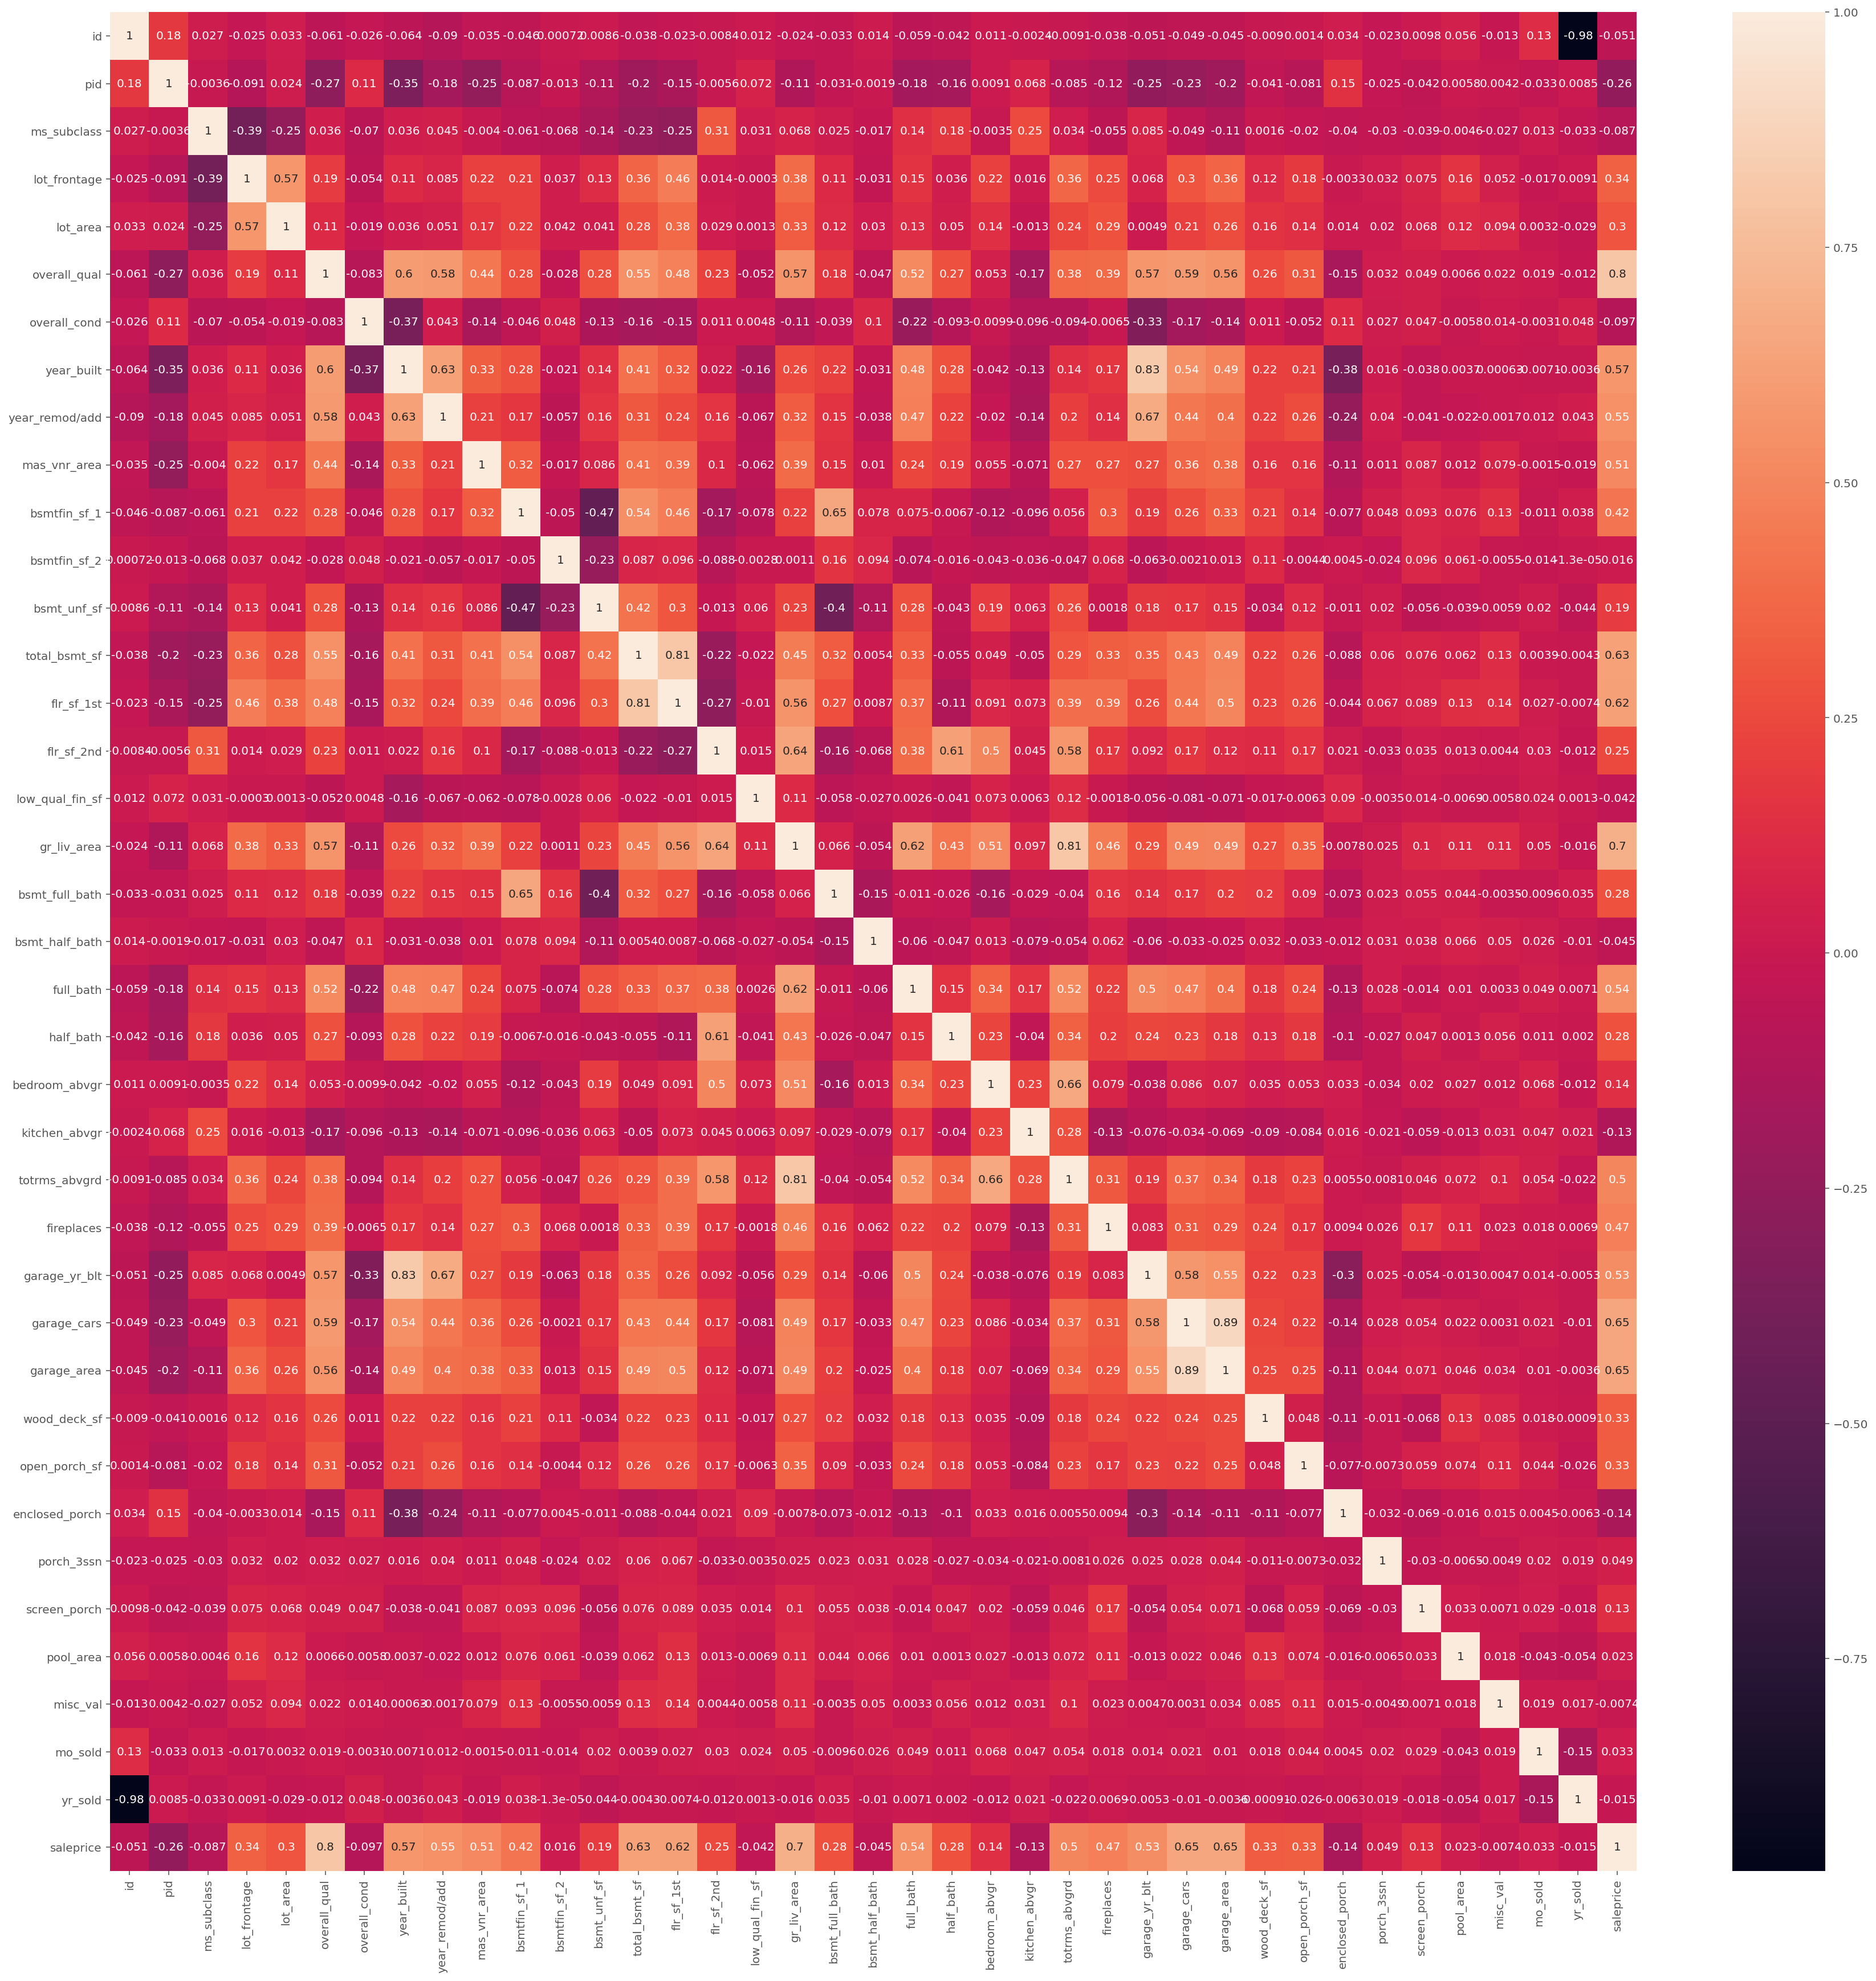

In [29]:
# show heatmap for correlation (train)
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot = True);

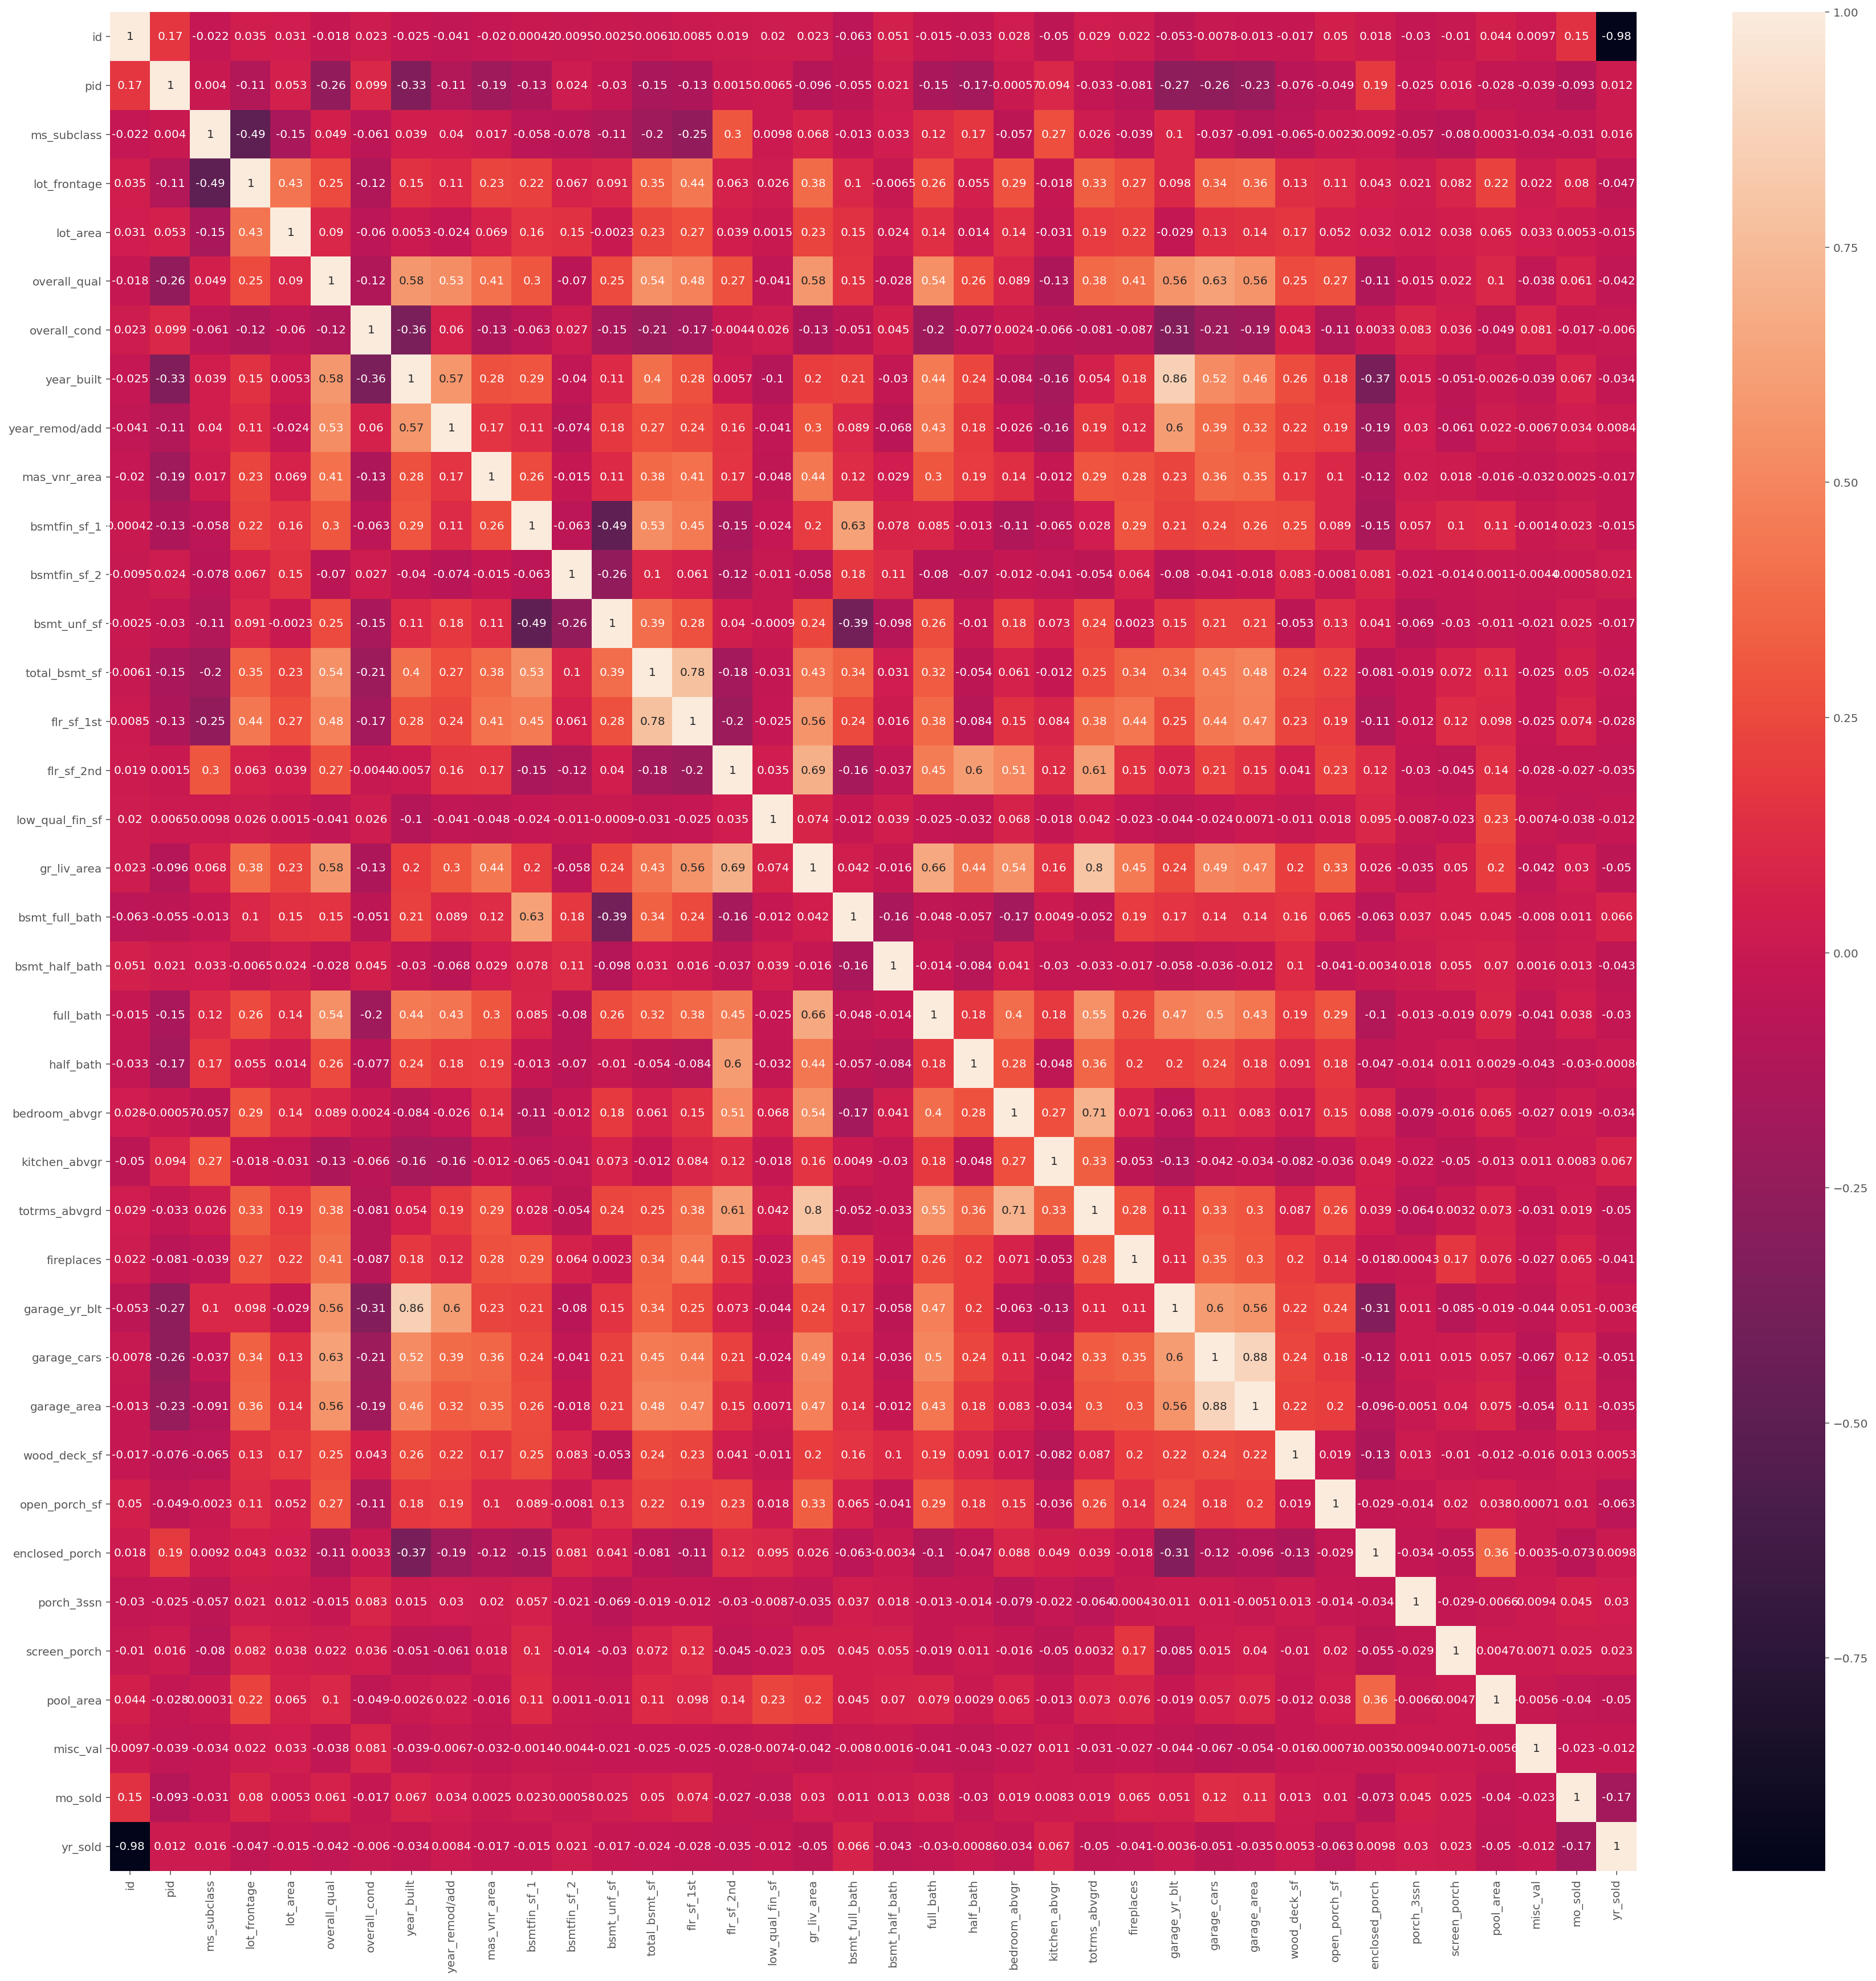

In [30]:
# show heatmap for correlation (train)
plt.figure(figsize=(30,30))
sns.heatmap(test.corr(), annot = True);

In [31]:
# view counts & null (test & train)
val_count(train,'lot_frontage' )
val_count(test,'lot_frontage' )

NaN      330
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
64.0      31
74.0      31
90.0      31
72.0      30
68.0      28
62.0      28
73.0      25
100.0     23
82.0      21
43.0      20
57.0      20
52.0      20
79.0      19
66.0      19
53.0      18
59.0      18
67.0      18
88.0      16
51.0      16
76.0      16
56.0      15
69.0      14
55.0      14
81.0      14
84.0      14
71.0      13
40.0      13
91.0      13
92.0      13
58.0      13
35.0      13
44.0      12
96.0      11
95.0      11
77.0      11
34.0      11
41.0      11
30.0      11
48.0      11
83.0      10
61.0      10
105.0      9
93.0       9
110.0      9
107.0      9
42.0       8
120.0      8
87.0       8
94.0       8
45.0       8
98.0       7
86.0       7
102.0      7
32.0       6
37.0       6
54.0       6
89.0       6
47.0       6
103.0      5
36.0       5
97.0       4
39.0       4
38.0       4
108.0      4
114.0      4

<div class="alert alert-block alert-info">
<b>Lot Frontage (both sets):</b> apart from having a 0.57 (train) and 0.43 (test) correlation to lot_area; a 0.46(train) and 0.44(test) correlation to flr_sf_1st, no other indicators seem to have a relationship with this parameter. 
    
Futher probing with property experts show that it is possible for houses to have zero frontage (e.g residential repurposed shophouses). 
    

After visually inspecting the list, it consist of many different subclasses, not all have alleys, with varying lot areas and house style. NaN values will be left untouched until I am certain on its impact on the training models.
</div>

***

In [32]:
# view counts & null (test & train)
val_count(train,'alley' )
val_count(test,'alley' )

NaN     1911
Grvl      85
Pave      55
Name: alley, dtype: int64
NaN     821
Grvl     35
Pave     23
Name: alley, dtype: int64


In [33]:
# view alley unique values (train)
viewuni(train, "alley")

[nan 'Pave' 'Grvl']


In [34]:
# view alley unique values (test)
viewuni(test, "alley")

['Grvl' nan 'Pave']


<div class="alert alert-block alert-info">
<b>Alley (both sets):</b> As there are no other indicators of alley, I will proceed to change this to the value "None", as indicated in the data dictionary as 'No alley access'
</div>

In [35]:
# replace NaN in alley to "None" (train)
replace_val(train, "alley", np.nan, "None")

# replace NaN in alley to "None" (test)
replace_val(test, "alley", np.nan, "None")

In [36]:
# check 
val_count(train,'alley')
val_count(test,'alley')

None    1911
Grvl      85
Pave      55
Name: alley, dtype: int64
None    821
Grvl     35
Pave     23
Name: alley, dtype: int64


***

#### 1.2.2 Masonry Veneer null values

 - mas_vnr_type (train): 22 nulls, Na - None
 - mas_vnr_type (test): 1 null, Na - None
 - mas_vnr_area (train): 22 nulls, if mas_vnr_type = None = 0
 - mas_vnr_area (test): 1 null, if mas_vnr_type = None = 0


Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)

In [37]:
# See unique values for mas_vnr_type (train)
viewuni(train,'mas_vnr_type')

# See unique values for mas_vnr_type (test)
viewuni(test,'mas_vnr_type')

['BrkFace' 'None' nan 'Stone' 'BrkCmn']
['None' 'BrkFace' 'Stone' 'BrkCmn' 'CBlock' nan]


In [38]:
# view counts & null (test & train)
val_count(train,'mas_vnr_type' )
val_count(test,'mas_vnr_type' )

None       1218
BrkFace     630
Stone       168
NaN          22
BrkCmn       13
Name: mas_vnr_type, dtype: int64
None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
NaN          1
Name: mas_vnr_type, dtype: int64


In [39]:
# view null (test)
viewnull(train,'mas_vnr_type')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22    2393  528142010           60        RL         103.0     12867   Pave   
41    2383  528110050           20        RL         107.0     13891   Pave   
86     539  531371050           20        RL          67.0     10083   Pave   
212    518  528458020           20        FV          90.0      7993   Pave   
276   2824  908130020           20        RL          75.0      8050   Pave   
338   1800  528458150           60        FV         112.0     12217   Pave   
431   1455  907251090           60        RL          75.0      9473   Pave   
451   1120  528439010           20        RL          87.0     10037   Pave   
591   1841  533208040          120        FV          35.0      4274   Pave   
844   1840  533208030          120        FV          30.0      5330   Pave   
913   2230  909475070           20        RL           NaN     32668   Pave   
939   1123  528462040           20        FV          95.0     11639   Pave   
1025  1784  528435010           20        RL          85.0      9965   Pave   
1244   485  528275160           60        RL           NaN     12891   Pave   
1306  1752  528250010           80        RL           NaN     11950   Pave   
1430  1185  534104100           60        FV           NaN      7500   Pave   
1434  1128  528480160           60        FV          65.0      8125   Pave   
1606  1096  528290090           60        RL           NaN      7750   Pave   
1699  2261  916384070           20        RL          68.0      8298   Pave   
1815  2456  528429100           20        RL          49.0     15218   Pave   
1820  1728  528218010           60        RL          59.0     15810   Pave   
1941    56  528240070           60        RL           NaN      7851   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
22    None       IR1          Lvl    AllPub     Corner        Gtl   
41    None       Reg          Lvl    AllPub     Inside        Gtl   
86    None       Reg          Lvl    AllPub     Inside        Gtl   
212   None       IR1          Lvl    AllPub     Inside        Gtl   
276   None       Reg          Lvl    AllPub     Inside        Gtl   
338   None       IR1          Lvl    AllPub     Inside        Gtl   
431   None       Reg          Lvl    AllPub     Inside        Gtl   
451   None       Reg          Lvl    AllPub     Corner        Gtl   
591   Pave       IR1          Lvl    AllPub     Inside        Gtl   
844   Pave       IR2          Lvl    AllPub     Inside        Gtl   
913   None       IR1          Lvl    AllPub    CulDSac        Gtl   
939   None       Reg          Lvl    AllPub     Corner        Gtl   
1025  None       Reg          Lvl    AllPub        FR2        Gtl   
1244  None       IR1          Lvl    AllPub     Corner        Gtl   
1306  None       IR1          Lvl    AllPub     Corner        Gtl   
1430  None       Reg          Lvl    AllPub     Inside        Gtl   
1434  None       Reg          Lvl    AllPub     Inside        Gtl   
1606  None       Reg          Lvl    AllPub     Inside        Gtl   
1699  None       IR1          HLS    AllPub     Inside        Gtl   
1815  None       IR1          Lvl    AllPub    CulDSac        Gtl   
1820  None       IR1          Lvl    AllPub     Inside        Gtl   
1941  None       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
22        NridgHt        Norm        Norm      1Fam      2Story             8   
41        NridgHt        Norm        Norm      1Fam      1Story            10   
86        SawyerW        Norm        Norm      1Fam      1Story             7   
212       Somerst        Norm        Norm      1Fam      1Story             7   
276       Edwards        Norm        Norm      1Fam      1Story             6   
338       Somerst        Norm        Norm      1Fam      2Story             8   
431       CollgCr        Norm      

In [40]:
# view null (test)
viewnull(test,'mas_vnr_type')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
866  868  907260030           60        RL          70.0      8749   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
866  None       Reg          Lvl    AllPub     Inside        Gtl      CollgCr   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
866        Norm        Norm      1Fam      2Story             7             5   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
866        2002            2002      Gable   CompShg      VinylSd   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
866      VinylSd          NaN           NaN         Gd         TA      PConc   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
866        Gd        TA            No            Unf             0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
866            Unf             0          840            840    GasA   

    heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
866         Ex           Y      SBrkr         840         885   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
866                0         1725               0               0          2   

     half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
866          1              3              1           Gd              6   

    functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
866        Typ           0          NaN      Attchd         2002.0   

    garage_finish  garage_cars  garage_area garage_qual garage_cond  \
866           RFn            2          550          TA          TA   

    paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
866           Y             0             48               0           0   

     screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
866             0          0     NaN   NaN          NaN         0       11   

     yr_sold sale_type  
866     2009       WD

In [41]:
# check if there are non null 'mas_vnr_area' rows where 'mas_vnr_type' = 'Nan' (train)
and_test(train, 'mas_vnr_type', np.nan, 'mas_vnr_area', np.nan)

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

<div class="alert alert-block alert-info">
<b>Masonary Veneer Type (both sets):</b> all nulls is accompanied by nulls for 'mas_vnr_area' confirming 'NaN' = "None".
</div>

In [42]:
# mas_vnr_type "NaN" for "None" (train)
replace_val(train,'mas_vnr_type', np.nan, "None")

# mas_vnr_type "NaN" for "None" (test)
replace_val(test,'mas_vnr_type', np.nan, "None")


# checking
val_count(train, "mas_vnr_type")
val_count(test, "mas_vnr_type")

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64
None       535
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64


***

In [43]:
# view null 'mas_vnr_area' (train)
viewnull(train,'mas_vnr_area')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22    2393  528142010           60        RL         103.0     12867   Pave   
41    2383  528110050           20        RL         107.0     13891   Pave   
86     539  531371050           20        RL          67.0     10083   Pave   
212    518  528458020           20        FV          90.0      7993   Pave   
276   2824  908130020           20        RL          75.0      8050   Pave   
338   1800  528458150           60        FV         112.0     12217   Pave   
431   1455  907251090           60        RL          75.0      9473   Pave   
451   1120  528439010           20        RL          87.0     10037   Pave   
591   1841  533208040          120        FV          35.0      4274   Pave   
844   1840  533208030          120        FV          30.0      5330   Pave   
913   2230  909475070           20        RL           NaN     32668   Pave   
939   1123  528462040           20        FV          95.0     11639   Pave   
1025  1784  528435010           20        RL          85.0      9965   Pave   
1244   485  528275160           60        RL           NaN     12891   Pave   
1306  1752  528250010           80        RL           NaN     11950   Pave   
1430  1185  534104100           60        FV           NaN      7500   Pave   
1434  1128  528480160           60        FV          65.0      8125   Pave   
1606  1096  528290090           60        RL           NaN      7750   Pave   
1699  2261  916384070           20        RL          68.0      8298   Pave   
1815  2456  528429100           20        RL          49.0     15218   Pave   
1820  1728  528218010           60        RL          59.0     15810   Pave   
1941    56  528240070           60        RL           NaN      7851   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
22    None       IR1          Lvl    AllPub     Corner        Gtl   
41    None       Reg          Lvl    AllPub     Inside        Gtl   
86    None       Reg          Lvl    AllPub     Inside        Gtl   
212   None       IR1          Lvl    AllPub     Inside        Gtl   
276   None       Reg          Lvl    AllPub     Inside        Gtl   
338   None       IR1          Lvl    AllPub     Inside        Gtl   
431   None       Reg          Lvl    AllPub     Inside        Gtl   
451   None       Reg          Lvl    AllPub     Corner        Gtl   
591   Pave       IR1          Lvl    AllPub     Inside        Gtl   
844   Pave       IR2          Lvl    AllPub     Inside        Gtl   
913   None       IR1          Lvl    AllPub    CulDSac        Gtl   
939   None       Reg          Lvl    AllPub     Corner        Gtl   
1025  None       Reg          Lvl    AllPub        FR2        Gtl   
1244  None       IR1          Lvl    AllPub     Corner        Gtl   
1306  None       IR1          Lvl    AllPub     Corner        Gtl   
1430  None       Reg          Lvl    AllPub     Inside        Gtl   
1434  None       Reg          Lvl    AllPub     Inside        Gtl   
1606  None       Reg          Lvl    AllPub     Inside        Gtl   
1699  None       IR1          HLS    AllPub     Inside        Gtl   
1815  None       IR1          Lvl    AllPub    CulDSac        Gtl   
1820  None       IR1          Lvl    AllPub     Inside        Gtl   
1941  None       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
22        NridgHt        Norm        Norm      1Fam      2Story             8   
41        NridgHt        Norm        Norm      1Fam      1Story            10   
86        SawyerW        Norm        Norm      1Fam      1Story             7   
212       Somerst        Norm        Norm      1Fam      1Story             7   
276       Edwards        Norm        Norm      1Fam      1Story             6   
338       Somerst        Norm        Norm      1Fam      2Story             8   
431       CollgCr        Norm      

In [44]:
# view null 'mas_vnr_area' (test)
viewnull(test,'mas_vnr_area')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
866  868  907260030           60        RL          70.0      8749   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
866  None       Reg          Lvl    AllPub     Inside        Gtl      CollgCr   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
866        Norm        Norm      1Fam      2Story             7             5   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
866        2002            2002      Gable   CompShg      VinylSd   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
866      VinylSd         None           NaN         Gd         TA      PConc   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
866        Gd        TA            No            Unf             0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
866            Unf             0          840            840    GasA   

    heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
866         Ex           Y      SBrkr         840         885   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
866                0         1725               0               0          2   

     half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
866          1              3              1           Gd              6   

    functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
866        Typ           0          NaN      Attchd         2002.0   

    garage_finish  garage_cars  garage_area garage_qual garage_cond  \
866           RFn            2          550          TA          TA   

    paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
866           Y             0             48               0           0   

     screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
866             0          0     NaN   NaN          NaN         0       11   

     yr_sold sale_type  
866     2009       WD

<div class="alert alert-block alert-info">
<b>Masonary Veneer Area (both sets):</b> all nulls are accompanied by "NaN" for 'mas_vnr_type', confirming 'NaN' = "0".
</div>

In [45]:
# mas_vnr_area "NaN" for "0" (train)
replace_val(train,'mas_vnr_area',np.nan, 0)

# mas_vnr_area "NaN" for "0" (test)
replace_val(test,'mas_vnr_area',np.nan, 0)


In [46]:
# checking
viewnull(train,'mas_vnr_area')

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [47]:
# checking
viewnull(test,'mas_vnr_area')

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

***

In [48]:
# check if there are'mas_vnr_area' > 0 rows where 'mas_vnr_type' = 'None' (train)
and_test(train, 'mas_vnr_type', 'None', 'mas_vnr_area', 0)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
765   1862  533352075           90        RL           NaN     18890   Pave   
810   2529  534129230           60        RL          80.0     10400   Pave   
1148  1914  535106140           20        RL          70.0     10150   Pave   
1684  2004  902427140           20        RM          52.0      8626   Pave   
1832   364  527166010           60        RL           NaN     10762   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
765   None       IR1          Lvl    AllPub     Inside        Gtl   
810   None       Reg          Lvl    AllPub     Inside        Gtl   
1148  None       Reg          Lvl    AllPub     Inside        Gtl   
1684  None       Reg          Lvl    AllPub     Inside        Gtl   
1832  None       IR1          Lvl    AllPub    CulDSac        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
765        Sawyer       Feedr        RRAe    Duplex      1.5Fin             5   
810        NWAmes        Norm        Norm      1Fam      2Story             6   
1148        NAmes       Feedr        Norm      1Fam      1Story             5   
1684      OldTown        Norm        Norm      1Fam      1Story             4   
1832      Gilbert        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
765              5        1977            1977       Shed   CompShg   
810              5        1972            1972      Gable   CompShg   
1148             5        1958            1958      Gable   CompShg   
1684             6        1956            1956      Gable   CompShg   
1832             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
765       Plywood      Plywood         None           1.0         TA   
810       VinylSd      VinylSd         None         288.0         TA   
1148      Wd Sdng      Wd Sdng         None           1.0         TA   
1684      MetalSd      MetalSd         None           1.0         TA   
1832      VinylSd      VinylSd         None         344.0         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
765          TA     CBlock        Gd        TA            No            GLQ   
810          TA     CBlock        TA        TA            No            Rec   
1148         TA     CBlock        TA        TA            No            Rec   
1684         TA     CBlock       NaN       NaN           NaN            NaN   
1832         TA      PConc        Gd        TA            No            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
765          498.0            Rec         211.0        652.0         1361.0   
810          247.0            Unf           0.0        485.0          732.0   
1148         456.0            Unf           0.0        456.0          912.0   
1684           0.0            NaN           0.0          0.0            0.0   
1832         694.0            Unf           0.0        284.0          978.0   

     heating heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
765     GasA         Ex           Y      SBrkr        1361        1259   
810     GasA         Gd           Y      SBrkr        1012         778   
1148    GasA         Ex           Y      FuseA         912           0   
1684    GasA         Gd           Y      SBrkr         968           0   
1832    GasA         Ex           Y      SBrkr        1005         978   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
765                 0         2620             0.0             0.0          2   
810                 0         1790             1.0             0.0          1   
1148                0          912             0.0             0.0          1   
1684                0          968             0.0  

In [49]:
# check if there are'mas_vnr_area' > 0 rows where 'mas_vnr_type' = 'None' (test)
and_test(test, 'mas_vnr_type', 'None', 'mas_vnr_area', 0)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
383  442  528138010           20        RL         102.0     13514   Pave   
863  404  527451110          160        RM          24.0      2368   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
383  None       IR1          Lvl    AllPub     Corner        Gtl      NridgHt   
863  None       Reg          Lvl    AllPub     Inside        Gtl       BrDale   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
383        Norm        Norm      1Fam      1Story             9             5   
863        Norm        Norm    TwnhsE      2Story             5             6   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
383        2008            2008        Hip   CompShg      VinylSd   
863        1970            1970      Gable   CompShg      HdBoard   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
383      VinylSd         None         285.0         Ex         TA      PConc   
863      HdBoard         None         312.0         TA         TA     CBlock   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
383        Ex        TA            No            GLQ          1142   
863        TA        TA            No            LwQ           765   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
383            Unf             0          632           1774    GasA   
863            Unf             0            0            765    GasA   

    heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
383         Ex           Y      SBrkr        1808           0   
863         TA           Y      SBrkr         765         600   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
383                0         1808               1               0          2   
863                0         1365               0               0          1   

     half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
383          0              3              1           Ex              7   
863          1              3              1           TA              7   

    functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
383        Typ           1           Gd      Attchd         2008.0   
863       Min1           0          NaN      Attchd         1970.0   

    garage_finish  garage_cars  garage_area garage_qual garage_cond  \
383           Fin            3          850          TA          TA   
863           Unf            2          440          TA          TA   

    paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
383           Y           200             26               0           0   
863           Y             0             36               0           0   

     screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
383             0          0     NaN   NaN          NaN         0        3   
863             0          0     NaN   NaN          NaN         0        5   

     yr_sold sale_type  
383     2009       WD   
863     2009       WD

<div class="alert alert-block alert-info">
<b>'mas_vnr_type'= 'None' (both sets):</b> these 7 rows with 'mas_vnr_type' as "None" have got positive values in 'mas_vnr_area'. As its 'mas_vnr_type' is given as "None", I will impute the value 0 for these 'mas_vnr_area' cells in both train and test datasets.
</div>

In [50]:
# replace values in train:
# create list of indices for replace function
index_list_train = [765, 810, 1148, 1684, 1832]
replace_sval(train, index_list_train, "mas_vnr_area", 0)

# replace values in test:
# create list of indices for replace function
index_list_test= [383,863]
replace_sval(test, index_list_test, "mas_vnr_area", 0)

765     0.0
810     0.0
1148    0.0
1684    0.0
1832    0.0
Name: mas_vnr_area, dtype: float64
383    0.0
863    0.0
Name: mas_vnr_area, dtype: float64


In [51]:
# check (train)
and_test(train, 'mas_vnr_type', 'None', 'mas_vnr_area', 0)

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [52]:
# check (test)
and_test(test, 'mas_vnr_type', 'None', 'mas_vnr_area', 0)

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

***

#### 1.2.3 Basement null values

 - bsmt_qual (train): 55 nulls , Na - No Basement, check bsmt_cond
 - bsmt_qual (test): 25 nulls , Na - No Basement, check bsmt_cond
 - bsmt_cond (train): 55 nulls , Na - No Basement, check bsmt_qual 
 - bsmt_cond (test): 25 nulls , Na - No Basement, check bsmt_qual
 - bsmt_exposure (train): 58 nulls , Na - No Basement, 3 nulls more than bsmt_qual, bsmt_cond
 - bsmt_exposure (test): 25 nulls , Na - No Basement, 3 nulls more than bsmt_qual, bsmt_cond
 - bsmtfin_type_1 (train): 55 nulls , Na - No Basement, check bsmt_qual 
 - bsmtfin_type_1 (test): 25 nulls , Na - No Basement, check bsmt_qual 
 - bsmtfin_sf_1 (train): 1 nulls , Na - No Basement = 0
 - bsmtfin_type_2 (train): 56 nulls , Na - No Basement
 - bsmtfin_type_2 (test): 25 nulls , Na - No Basement
 - bsmtfin_sf_2 (train): 1 nulls , Na - No Basement = 0
 - bsmt_unf_sf (train): 1 nulls , check bsmtfin_sf_1, bsmtfin_sf_2
 - total_bsmt_sf (train): 1 nulls , check bsmtfin_sf_1, bsmtfin_sf_2
 - bsmt_full_bath (train): 2 nulls , check bsmt_qual
 - bsmt_half_bath (train): 2 nulls , check bsmt_qual


Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)

In [53]:
# view unique in bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_type_2 (train)

print(viewuni(train, 'bsmt_qual'))
print(viewuni(train, 'bsmt_cond'))
print(viewuni(train, 'bsmt_exposure'))
print(viewuni(train, 'bsmtfin_type_1'))
print(viewuni(train, 'bsmtfin_type_2'))


['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
None
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
None
['No' 'Gd' 'Av' nan 'Mn']
None
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
None
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
None


In [54]:
# view unique in bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_type_2 (test)
print(viewuni(test, 'bsmt_qual'))
print(viewuni(test, 'bsmt_cond'))
print(viewuni(test, 'bsmt_exposure'))
print(viewuni(test, 'bsmtfin_type_1'))
print(viewuni(test, 'bsmtfin_type_2'))

['Fa' 'Gd' 'TA' 'Ex' nan 'Po']
None
['TA' 'Gd' nan 'Fa']
None
['No' 'Av' nan 'Mn' 'Gd']
None
['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' nan 'LwQ']
None
['Unf' 'LwQ' nan 'ALQ' 'GLQ' 'Rec' 'BLQ']
None


***


In [55]:
# check if there are 'bsmt_cond' are not 'NaN' rows where 'bsmt_exposure' = 'NaN' (train)
null_test(train,'bsmt_exposure', 'bsmt_cond')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1456  1797  528458090           60        FV          81.0     10411   Pave   
1547    67  528445060           20        RL          73.0      8987   Pave   
1997  2780  907194130           60        RL          65.0     14006   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1456  None       Reg          Lvl    AllPub     Corner        Gtl   
1547  None       Reg          Lvl    AllPub     Inside        Gtl   
1997  None       IR1          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1456      Somerst        Norm        Norm      1Fam      2Story             5   
1547      Somerst        Norm        Norm      1Fam      1Story             8   
1997      CollgCr        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1456             5        2007            2007      Gable   CompShg   
1547             5        2005            2006      Gable   CompShg   
1997             5        2002            2002      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1456      VinylSd      VinylSd         None           0.0         Gd   
1547      VinylSd      VinylSd      BrkFace         226.0         Gd   
1997      VinylSd      VinylSd      BrkFace         144.0         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1456         TA     CBlock        Gd        TA           NaN            Unf   
1547         TA      PConc        Gd        TA           NaN            Unf   
1997         TA      PConc        Gd        TA           NaN            Unf   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1456           0.0            Unf           0.0        725.0          725.0   
1547           0.0            Unf           0.0       1595.0         1595.0   
1997           0.0            Unf           0.0        936.0          936.0   

     heating heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
1456    GasA         Ex           Y      SBrkr         725         863   
1547    GasA         Ex           Y      SBrkr        1595           0   
1997    GasA         Ex           Y      SBrkr         936         840   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1456                0         1588             0.0             0.0          3   
1547                0         1595             0.0             0.0          2   
1997                0         1776             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1456          0              3              1           Gd              8   
1547          0              2              1           Gd              6   
1997          1              3              1           Gd              7   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1456        Typ           0          NaN      Attchd         2007.0   
1547        Typ           1           Gd      Attchd         2005.0   
1997        Typ           1           TA      Attchd         2002.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1456           Unf          2.0        561.0          TA          TA   
1547           RFn          3.0        880.0          TA          TA   
1997           RFn          2.0        474.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
1456           Y             0              0               0           0   
1547           Y           144              0               0           0   
1997           Y           144             96               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val 

In [56]:
# checking most frequent for 'bsmt_exposure', when 'bsmt_qual' == "Gd" & 'bsmt_cond' == 'TA' (train)

mask = (train['bsmt_qual'] == "Gd") & (train['bsmt_cond'] == 'TA')
train['bsmt_exposure'][mask].describe()


count     810
unique      4
top        No
freq      473
Name: bsmt_exposure, dtype: object

<div class="alert alert-block alert-info">
<b>Basement Exposure (train):</b> searching by nulls shows 3 rows with 'bsmt_qual' == "Gd" & 'bsmt_cond' == 'TA'. 
    
These cells are to be replaced by the mode ("No") for 'bsmt_exposure' satisfying the same conditions. 
    
<b>Remaining 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1' and 'bsmtfin_type_2':</b> 
all show nulls, null values are to be replaced by 'None'.
</div>

In [57]:
# imputing mode in the 3 rows (train)

#indices list
index_list_train = [1456,1547,1997]
replace_sval(train, index_list_train, "bsmt_exposure", "No")


1456    No
1547    No
1997    No
Name: bsmt_exposure, dtype: object


In [58]:
# check replaced (train)
print(train['bsmt_exposure'][1456])
print(train['bsmt_exposure'][1547])
print(train['bsmt_exposure'][1997])

No
No
No


***

In [59]:
# view counts & null (train)

val_count(train,'bsmt_qual')
val_count(train,'bsmt_cond')
val_count(train,'bsmt_exposure')
val_count(train,'bsmtfin_type_1')
val_count(train,'bsmtfin_type_2')

TA     887
Gd     864
Ex     184
Fa      60
NaN     55
Po       1
Name: bsmt_qual, dtype: int64
TA     1834
Gd       89
Fa       65
NaN      55
Po        5
Ex        3
Name: bsmt_cond, dtype: int64
No     1342
Av      288
Gd      203
Mn      163
NaN      55
Name: bsmt_exposure, dtype: int64
GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NaN     55
Name: bsmtfin_type_1, dtype: int64
Unf    1749
Rec      80
LwQ      60
NaN      56
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64


In [60]:
# replace values for bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 and bsmtfin_type_2, ..
# .. from null to "None" (train)

# list columns to be replaced
list_replace = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']

# replace values via list
replace_val(train, list_replace, np.nan, "None")


In [61]:
# check
val_count(train,'bsmt_qual')
val_count(train,'bsmt_cond')
val_count(train,'bsmt_exposure')
val_count(train,'bsmtfin_type_1')
val_count(train,'bsmtfin_type_2')

TA      887
Gd      864
Ex      184
Fa       60
None     55
Po        1
Name: bsmt_qual, dtype: int64
TA      1834
Gd        89
Fa        65
None      55
Po         5
Ex         3
Name: bsmt_cond, dtype: int64
No      1342
Av       288
Gd       203
Mn       163
None      55
Name: bsmt_exposure, dtype: int64
GLQ     615
Unf     603
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     55
Name: bsmtfin_type_1, dtype: int64
Unf     1749
Rec       80
LwQ       60
None      56
BLQ       48
ALQ       35
GLQ       23
Name: bsmtfin_type_2, dtype: int64


***

In [62]:
# view counts & null (test)
val_count(test,'bsmt_qual')
val_count(test,'bsmt_cond')
val_count(test,'bsmt_exposure')
val_count(test,'bsmtfin_type_1')
val_count(test,'bsmtfin_type_2')

TA     396
Gd     355
Ex      74
Fa      28
NaN     25
Po       1
Name: bsmt_qual, dtype: int64
TA     782
Fa      39
Gd      33
NaN     25
Name: bsmt_cond, dtype: int64
No     567
Av     130
Gd      81
Mn      76
NaN     25
Name: bsmt_exposure, dtype: int64
Unf    248
GLQ    244
ALQ    136
Rec    105
BLQ     69
LwQ     52
NaN     25
Name: bsmtfin_type_1, dtype: int64
Unf    750
LwQ     29
Rec     26
NaN     25
BLQ     20
ALQ     18
GLQ     11
Name: bsmtfin_type_2, dtype: int64


In [63]:
# check if there are 'bsmt_cond' are not nulls rows where 'bsmt_exposure' = 'NaN' (test)
null_test(test,'bsmt_exposure', 'bsmt_cond')

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

<div class="alert alert-block alert-info">
<b>Basement Exposure (test):</b> there are no null values with non-null in other 'bsmt ..' columns. 
    
<b>'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1' and 'bsmtfin_type_2': </b> all show null, null values are to be replaced by 'None'.
</div>

In [64]:
# replace values for bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 and bsmtfin_type_2, .. 
#.. from 'NaN' to "None" (test)

#list columns to be replaced
list_replace = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']

#replace values via list
replace_val(test, list_replace, np.nan, "None")


In [65]:
# check
val_count(test,'bsmt_qual')
val_count(test,'bsmt_cond')
val_count(test,'bsmt_exposure')
val_count(test,'bsmtfin_type_1')
val_count(test,'bsmtfin_type_2')

TA      396
Gd      355
Ex       74
Fa       28
None     25
Po        1
Name: bsmt_qual, dtype: int64
TA      782
Fa       39
Gd       33
None     25
Name: bsmt_cond, dtype: int64
No      567
Av      130
Gd       81
Mn       76
None     25
Name: bsmt_exposure, dtype: int64
Unf     248
GLQ     244
ALQ     136
Rec     105
BLQ      69
LwQ      52
None     25
Name: bsmtfin_type_1, dtype: int64
Unf     750
LwQ      29
Rec      26
None     25
BLQ      20
ALQ      18
GLQ      11
Name: bsmtfin_type_2, dtype: int64


***

In [66]:
# check bsmtfin_sf_1 for null (train)
viewnull(train,'bsmtfin_sf_1')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1327  1342  903230120           20        RM          99.0      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1327  None       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1327         TA      PConc      None      None          None           None   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1327           NaN           None           NaN          NaN            NaN   

     heating heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

<div class="alert alert-block alert-info">
<b>Index 1327 (train):</b> Index has returned null for four columns bsmtfin_sf_1 , bsmtfin_sf_2, bsmt_unf_sf and total_bsmt_sf, since it has no basements, I will impute the sqft to the value 0.
</div>

In [67]:
# replace bsmtfin_sf_1 , bsmtfin_sf_2, bsmt_unf_sf and total_bsmt_sf 'NaN' values to 0 (train)

# list columns to be replaced
list_replace = ['bsmtfin_sf_1' , 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf']

# replace values via list
replace_val(train, list_replace, np.nan, 0)

In [68]:
# check 
viewnull(train,'bsmtfin_sf_1')

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

***

In [69]:
# view counts & null (train)
val_count(train,'bsmt_full_bath')
val_count(train,'bsmt_half_bath')
val_count(test,'bsmt_full_bath')
val_count(test,'bsmt_half_bath')

0.0    1200
1.0     824
2.0      23
3.0       2
NaN       2
Name: bsmt_full_bath, dtype: int64
0.0    1923
1.0     122
2.0       4
NaN       2
Name: bsmt_half_bath, dtype: int64
0    507
1    357
2     15
Name: bsmt_full_bath, dtype: int64
0    830
1     49
Name: bsmt_half_bath, dtype: int64


In [70]:
# view null bsmt_full_bath (train)
viewnull(train,'bsmt_full_bath')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
616   1498  908154080           20        RL         123.0     47007   Pave   
1327  1342  903230120           20        RM          99.0      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
616   None       IR1          Lvl    AllPub     Inside        Gtl   
1327  None       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
616       Edwards        Norm        Norm      1Fam      1Story             5   
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
616              7        1959            1996      Gable   CompShg   
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
616       Plywood      Plywood         None           0.0         TA   
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
616          TA       Slab      None      None          None           None   
1327         TA      PConc      None      None          None           None   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
616            0.0           None           0.0          0.0            0.0   
1327           0.0           None           0.0          0.0            0.0   

     heating heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
616     GasA         TA           Y      SBrkr        3820           0   
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
616                 0         3820             NaN             NaN          3   
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
616           1              5              1           Ex             11   
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
616         Typ           2           Gd      Attchd         1959.0   
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
616            Unf          2.0        624.0          TA          TA   
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
616            Y             0            372               0           0   
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
616              0          0     NaN    NaN          NaN         0        7   
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
616      2008       WD      284700  
1327     2008     ConLD      79000

<div class="alert alert-block alert-info">
<b>Basement Full & Half baths (train):</b> These entries have no basement, therefore i will replace the null values with 0
</div>

In [71]:
# replace bsmt_full_bath and bsmt_half_bath 'NaN' values to 0 (train)
replace_list = ['bsmt_full_bath', 'bsmt_half_bath']
replace_val(train,replace_list, np.nan, 0)


In [72]:
# check
val_count(train,'bsmt_full_bath' )
val_count(train,'bsmt_half_bath' )

0.0    1202
1.0     824
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64
0.0    1925
1.0     122
2.0       4
Name: bsmt_half_bath, dtype: int64


***

#### 1.2.4 Fireplace null values

 - fireplace_qu (train): 1000 nulls , NA No Fireplace, check fireplaces 
 - fireplace_qu (test): 422 nulls , NA No Fireplace, check fireplaces 


Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)

In [73]:
# view counts & null (train)
val_count(train,'fireplaces')
val_count(train,'fireplace_qu')
val_count(test,'fireplaces')
val_count(test,'fireplace_qu')

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64
NaN    1000
Gd      523
TA      407
Fa       59
Ex       31
Po       31
Name: fireplace_qu, dtype: int64
0    422
1    376
2     75
3      6
Name: fireplaces, dtype: int64
NaN    422
Gd     221
TA     193
Fa      16
Po      15
Ex      12
Name: fireplace_qu, dtype: int64


In [74]:
# view unique values (train)
viewuni(train,'fireplace_qu')

#view unique values (test)
viewuni(test,'fireplace_qu')

[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
[nan 'Gd' 'Fa' 'TA' 'Po' 'Ex']


In [75]:
# checking (train) for fireplaces > 0 when fireplace_qu = 'Nan'

and_test(train, 'fireplace_qu', np.nan, 'fireplaces', 0)

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [76]:
# checking (test) for fireplaces > 0 when fireplace_qu = 'Nan'

and_test(test, 'fireplace_qu', np.nan, 'fireplaces', 0)

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

<div class="alert alert-block alert-info">
<b>Fireplace Quality (both sets):</b> fireplaces 0 counts = fireplace_qu null counts. 
    
There are no non-null fireplaces value with null fireplace_qu values. As per the data dictionary, Na indicates no fireplace. Therefore I will replace the null values with 0.
</div>

In [77]:
# replace fireplace_qu 'NaN' with 'None' (train)
replace_val(train,'fireplace_qu', np.nan, "None")

# replace fireplace_qu 'NaN' with 'None' (test)
replace_val(test,'fireplace_qu', np.nan, "None")

In [78]:
# check
val_count(train,'fireplace_qu' )
val_count(test,'fireplace_qu' )

None    1000
Gd       523
TA       407
Fa        59
Ex        31
Po        31
Name: fireplace_qu, dtype: int64
None    422
Gd      221
TA      193
Fa       16
Po       15
Ex       12
Name: fireplace_qu, dtype: int64


***

#### 1.2.5 Garage null values

 - garage_type (train): 113 nulls , NA No Garage
 - garage_type (test): 44 nulls , NA No Garage
 - garage_yr_blt (train): 114 nulls , check garage_type
 - garage_yr_blt (test): 45 nulls , check garage_type
 - garage_finish (train): 114 nulls , check garage_type
 - garage_finish (test): 45 nulls , check garage_type
 - garage_cars (train): 1 nulls , check garage_type
 - garage_area (train): 1 nulls , check garage_type
 - garage_qual (train): 114 nulls , check garage_type
 - garage_qual (test): 45 nulls , check garage_type
 - garage_cond (train): 114 nulls , check garage_type
 - garage_cond (test): 45 nulls , check garage_type


Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)

In [79]:
# view counts & null (train)
val_count(train,'garage_type')
val_count(train,'garage_finish')
val_count(train,'garage_qual')
val_count(train,'garage_cond')
val_count(train,'garage_cars')
val_count(train,'garage_area')

Attchd     1213
Detchd      536
BuiltIn     132
NaN         113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64
Unf    849
RFn    579
Fin    509
NaN    114
Name: garage_finish, dtype: int64
TA     1832
NaN     114
Fa       82
Gd       18
Ex        3
Po        2
Name: garage_qual, dtype: int64
TA     1868
NaN     114
Fa       47
Gd       12
Po        8
Ex        2
Name: garage_cond, dtype: int64
2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
NaN       1
5.0       1
Name: garage_cars, dtype: int64
0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
240.0      45
400.0      43
288.0      43
480.0      39
264.0      33
308.0      32
280.0      24
420.0      18
336.0      18
504.0      18
462.0      17
672.0      17
216.0      16
312.0      16
572.0      15
624.0      14
180.0      14
384.0      13
506.0      13
550.0      13
478.0      13
564.0      12
352.0      12
660.0      12
525.0      12
300.0      11
720.0      11
360.0 

In [80]:
# check if there are 'garage_type' are not 'NaN' rows where 'garage_cond' = 'NaN' (train)
null_test(train, 'garage_cond', 'garage_type')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1712  2237  910201180           70        RM          50.0      9060   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1712  None       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1712       IDOTRR        Norm        Norm      1Fam      2Story             5   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1712             6        1923            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1712      Wd Sdng      Plywood         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1712         TA     BrkTil        Gd        TA            No            ALQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1712         548.0            Unf           0.0        311.0          859.0   

     heating heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
1712    GasA         Ex           Y      SBrkr         942         886   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1712                0         1828             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1712          0              3              1           Gd              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1712        Typ           0         None      Detchd            NaN   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1712           NaN          NaN          NaN         NaN         NaN   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
1712           Y           174              0             212           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1712             0          0     NaN  MnPrv          NaN         0        3   

      yr_sold sale_type  saleprice  
1712     2007       WD      150909

<div class="alert alert-block alert-info">
<b>Index 1712 (train):</b> has nulls for all Garage values except garage type "Detchd". 
    
I shall impute all garage data to "None" and "0" as there is no way of finding out their missing values.
</div>

In [81]:
# replace Garage values 'NaN' with "None", except garage_yr_blt(train)
replace_list =['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']
replace_val(train, replace_list, np.nan, "None")


# replace garage_cars and garage_area values 'NaN' with 0
replace_list1 = ['garage_cars', 'garage_area']
replace_val(train,replace_list1, np.nan, 0)


In [82]:
# check
val_count(train,'garage_type')
val_count(train,'garage_finish')
val_count(train,'garage_qual')
val_count(train,'garage_cond')
val_count(train,'garage_cars')
val_count(train,'garage_area')

Attchd     1213
Detchd      536
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64
Unf     849
RFn     579
Fin     509
None    114
Name: garage_finish, dtype: int64
TA      1832
None     114
Fa        82
Gd        18
Ex         3
Po         2
Name: garage_qual, dtype: int64
TA      1868
None     114
Fa        47
Gd        12
Po         8
Ex         2
Name: garage_cond, dtype: int64
2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: garage_cars, dtype: int64
0.0       114
440.0      70
576.0      69
484.0      52
528.0      46
240.0      45
400.0      43
288.0      43
480.0      39
264.0      33
308.0      32
280.0      24
504.0      18
420.0      18
336.0      18
462.0      17
672.0      17
216.0      16
312.0      16
572.0      15
180.0      14
624.0      14
550.0      13
384.0      13
506.0      13
478.0      13
660.0      12
564.0      12
352.0      12
525.0      12
300.0      11
720.0      11
28

***

In [83]:
# view counts & null (test)
val_count(test,'garage_type')
val_count(test,'garage_finish')
val_count(test,'garage_qual')
val_count(test,'garage_cond')

Attchd     518
Detchd     246
BuiltIn     54
NaN         44
Basment      9
CarPort      4
2Types       4
Name: garage_type, dtype: int64
Unf    382
RFn    233
Fin    219
NaN     45
Name: garage_finish, dtype: int64
TA     783
NaN     45
Fa      42
Gd       6
Po       3
Name: garage_qual, dtype: int64
TA     797
NaN     45
Fa      27
Po       6
Gd       3
Ex       1
Name: garage_cond, dtype: int64


In [84]:
# check if there are 'garage_type' are not 'NaN' rows where 'garage_cond' = 'NaN' (test)
null_test(test, 'garage_cond', 'garage_type')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
765  1357  903426160           60        RM          57.0      8094   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
765  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
765        Norm        Norm    2fmCon      2.5Unf             6             8   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
765        1910            1983      Gable   CompShg      Wd Sdng   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
765      Wd Sdng         None           0.0         TA         TA      PConc   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
765        TA        TA            Mn            Rec           196   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
765            Unf             0         1046           1242    GasA   

    heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
765         Gd           Y      SBrkr        1242         742   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
765                0         1984               0               0          2   

     half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
765          0              5              1           TA              8   

    functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
765        Typ           0         None      Detchd            NaN   

    garage_finish  garage_cars  garage_area garage_qual garage_cond  \
765           NaN            1          360         NaN         NaN   

    paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
765           Y            64              0             180           0   

     screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
765             0          0     NaN  MnPrv         Shed      1000        9   

     yr_sold sale_type  
765     2008       WD

<div class="alert alert-block alert-info">
<b>Index 765 (test):</b> has nulls for all Garage values except garage type "Detchd". 
    
    
I shall impute all garage data to "None" or "0" as there is no way of finding out their missing values.
</div>

In [85]:
# replace Garage values 'NaN' with "None", except garage_yr_blt(test)
replace_list =['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']
replace_val(test, replace_list, np.nan, "None")


In [86]:
# check
val_count(test,'garage_type')
val_count(test,'garage_finish')
val_count(test,'garage_qual')
val_count(test,'garage_cond')


Attchd     518
Detchd     246
BuiltIn     54
None        44
Basment      9
CarPort      4
2Types       4
Name: garage_type, dtype: int64
Unf     382
RFn     233
Fin     219
None     45
Name: garage_finish, dtype: int64
TA      783
None     45
Fa       42
Gd        6
Po        3
Name: garage_qual, dtype: int64
TA      797
None     45
Fa       27
Po        6
Gd        3
Ex        1
Name: garage_cond, dtype: int64


***

In [87]:
# view unique values
viewuni(train,'garage_yr_blt')
viewuni(test,'garage_yr_blt')

[1976. 1997. 1953. 2007. 1957. 1966. 2005. 1959. 1952. 1969. 1971. 1900.
 2000. 2004. 1916. 1963. 1977. 2009. 1968. 1992. 1955. 1961. 1973. 1937.
   nan 2003. 1981. 1931. 1995. 1958. 1965. 2006. 1978. 1954. 1935. 1951.
 1996. 1999. 1920. 1930. 1924. 1960. 1949. 1986. 1956. 1994. 1979. 1964.
 2001. 1972. 1939. 1962. 1927. 1948. 1967. 1993. 2010. 1915. 1987. 1970.
 1988. 1982. 1941. 1984. 1942. 1950. 2002. 1975. 2008. 1974. 1998. 1918.
 1938. 1985. 1923. 1980. 1991. 1946. 1940. 1990. 1896. 1983. 1914. 1945.
 1921. 1925. 1926. 1936. 1932. 1947. 1929. 1910. 1917. 1922. 1934. 1989.
 1928. 2207. 1933. 1895. 1919.]
[1910. 1977. 2006. 1935. 1963. 1972. 1959. 1978. 2004. 1980. 1991. 1993.
 1954. 2000. 1943. 1957. 1940. 1956. 1961. 1925. 1968. 1982. 1969. 2007.
 1989. 1920. 1937.   nan 1979. 1962. 1950. 1973. 2001. 1952. 1953. 1999.
 2009. 1998. 1974. 1951. 1987. 2003. 1924. 1970. 1975. 1958. 1971. 1992.
 1994. 2005. 1960. 1967. 2002. 1997. 1981. 1938. 1988. 1939. 1927. 1984.
 1964. 1995. 2008. 

In [88]:
# check
train['garage_yr_blt'].isnull().sum()


114

In [89]:
# check
val_count(train,'garage_finish')

Unf     849
RFn     579
Fin     509
None    114
Name: garage_finish, dtype: int64


In [90]:
# check
test['garage_yr_blt'].isnull().sum()

45

In [91]:
# check
val_count(test,'garage_finish')

Unf     382
RFn     233
Fin     219
None     45
Name: garage_finish, dtype: int64


<div class="alert alert-block alert-info">
<b>Garage Year Built (train & test):</b> null values will remain as so, as there is no year of built when there is no garage.
</div>


***

#### 1.2.6 Other null values

 - pool_qc (train): 2042 nulls , NA No Pool
 - pool_qc (test): 875 nulls , NA No Pool
 - fence (train): 1651 nulls, NA No Fence
 - fence (test): 707 nulls, NA No Fence
 - misc_feature (train): 1986 nulls, NA None
 - misc_feature (test): 838 nulls, NA None
 - electrical (test): 1 null, investigate

<blockquote>
<b>pool_qc : </b> as per the data dictionary, Na indicates no pool. Therefore I will replace the 'NaN' Values with "None"

<b>fence:</b> as per the data dictionary, Na indicates no fence. Therefore I will replace the 'NaN' Values with "None" 

<b>misc_feature:</b> as per the data dictionary, Na indicates no misc features. Therefore I will replace the 'NaN' Values with "None"
</blockquote>

Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)


In [92]:
# view unique values (train & test)

viewuni(train,'pool_qc')
viewuni(test,'pool_qc')

[nan 'Fa' 'Gd' 'Ex' 'TA']
[nan 'Ex' 'TA']


In [93]:
# view counts & null (train & test)
val_count(train,'pool_qc')
val_count(test,'pool_qc')

NaN    2042
Gd        4
TA        2
Fa        2
Ex        1
Name: pool_qc, dtype: int64
NaN    875
Ex       3
TA       1
Name: pool_qc, dtype: int64


In [94]:
#v iew null vs 0 in pool_qc and pool_area (train)
val_count(train,'pool_qc')
val_count(train,'pool_area')

NaN    2042
Gd        4
TA        2
Fa        2
Ex        1
Name: pool_qc, dtype: int64
0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: pool_area, dtype: int64


In [95]:
# view null vs 0 in pool_qc and pool_area (test)
val_count(test,'pool_qc')
val_count(test,'pool_area')

NaN    875
Ex       3
TA       1
Name: pool_qc, dtype: int64
0      875
555      1
512      1
444      1
144      1
Name: pool_area, dtype: int64


In [96]:
# test if there are instances of pool_area not being 0, when pool_qc is null (train)
and_test(train, 'pool_qc', np.nan,'pool_area', 0 )

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [97]:
# test if there are instances of pool_area not being 0, when pool_qc is null (test)
and_test(test, 'pool_qc', np.nan,'pool_area', 0 )

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

<div class="alert alert-block alert-info">
<b> Pool (both sets):</b> Na indicates no pool. Therefore I will replace the null values with "None".
</div>

In [98]:
# replace values for pool_qc for null to "None" (both)

replace_val(train, 'pool_qc', np.nan, "None")
replace_val(test, 'pool_qc', np.nan, "None")

***

In [99]:
#v iew unique values (train & test)
viewuni(train,'fence')
viewuni(test,'fence')

[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [100]:
# view counts & null (train & test)
val_count(train,'fence')
val_count(test,'fence')

NaN      1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64
NaN      707
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: fence, dtype: int64


<div class="alert alert-block alert-info">
<b> Fence (both sets):</b> as per the data dictionary, Na indicates no fence. 
    With no other columns indicating otherwise, I will replace the null values with "None".
</div>

In [101]:
# replace values for 'fence' to 'None' (train & test)
replace_val(train, 'fence', np.nan, 'None')
replace_val(test, 'fence', np.nan, 'None')

In [102]:
# check
val_count(train,'fence')
val_count(test,'fence')

None     1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64
None     707
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: fence, dtype: int64


***

In [103]:
# view unique values (train & test)
viewuni(train,'misc_feature')
viewuni(test,'misc_feature')

[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
[nan 'Shed' 'Othr' 'Gar2']


In [104]:
# view counts & null (train)
val_count(train,'misc_feature')
val_count(train,'misc_val')

NaN     1986
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: misc_feature, dtype: int64
0        1986
400        12
500         8
600         6
2000        5
450         5
700         4
2500        2
4500        2
3000        2
1200        2
80          1
8300        1
12500       1
460         1
300         1
54          1
3500        1
480         1
650         1
800         1
900         1
1150        1
1300        1
1500        1
6500        1
455         1
17000       1
Name: misc_val, dtype: int64


In [105]:
# test if there are instances of misc_val not being 0, when misc_feature is null (train)
and_test(train, 'misc_feature', np.nan,'misc_val', 0 )

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [106]:
# replace misc_feature from null to "None" (train)
replace_val(train, 'misc_feature', np.nan, "None")

In [107]:
# check
val_count(train,'misc_feature')
val_count(train,'misc_val')

None    1986
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: misc_feature, dtype: int64
0        1986
400        12
500         8
600         6
2000        5
450         5
700         4
2500        2
4500        2
3000        2
1200        2
80          1
8300        1
12500       1
460         1
300         1
54          1
3500        1
480         1
650         1
800         1
900         1
1150        1
1300        1
1500        1
6500        1
455         1
17000       1
Name: misc_val, dtype: int64


***

In [108]:
# view counts & null (test)
val_count(test,'misc_feature')
val_count(test,'misc_val')

NaN     838
Shed     39
Othr      1
Gar2      1
Name: misc_feature, dtype: int64
0        841
400        6
500        5
450        4
700        3
650        2
600        2
2000       2
1500       2
420        1
15500      1
1200       1
350        1
1400       1
1000       1
480        1
490        1
560        1
620        1
750        1
1512       1
Name: misc_val, dtype: int64


In [109]:
# test if there are instances of misc_val not being 0, when misc_feature is null (test)
and_test(test, 'misc_feature', np.nan,'misc_val', 0 )

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, flr_sf_1st, flr_sf_2nd, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, porch_3ssn, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

In [110]:
# test if there are instances of misc_val being 0, when misc_feature is not null (test)
mask = (test['misc_val']==0) & (test['misc_feature'].notnull())
test.loc[mask]
    

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
220  1964  535453080           20        RL           NaN      7500   Pave   
343   676  535450070           40        RL          60.0     12144   Pave   
542  2361  527402380           20        RL          71.0      9353   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
220  None       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
343  None       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
542  None       Reg          Lvl    AllPub     Inside        Gtl        NAmes   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
220        Norm        Norm      1Fam      1Story             5             7   
343        Norm        Norm      1Fam      1Story             5             7   
542        Norm        Norm      1Fam      1Story             4             5   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
220        1959            2003        Hip   CompShg      BrkFace   
343        1949            1950      Gable   CompShg      HdBoard   
542        1970            1970      Gable   CompShg      MetalSd   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
220      BrkFace         None           0.0         TA         TA     CBlock   
343      HdBoard         None           0.0         Gd         TA     CBlock   
542      MetalSd         None           0.0         TA         TA     CBlock   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
220        TA        TA            No            GLQ           574   
343        TA        TA            No            Rec           375   
542        TA        TA            No            Unf             0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
220            Unf             0          466           1040    GasA   
343            Unf             0          457            832    GasA   
542            Unf             0          864            864    GasA   

    heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
220         Ex           Y      SBrkr        1040           0   
343         Gd           Y      SBrkr        1036           0   
542         Gd           Y      SBrkr         864           0   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
220                0         1040               1               0          1   
343              232         1268               0               0          1   
542                0          864               0               0          1   

     half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
220          0              3              1           Gd              6   
343          0              3              1           TA              6   
542          0              3              1           TA              5   

    functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
220        Typ           0         None      Attchd         1959.0   
343        Typ           1           Gd      Attchd         1949.0   
542        Typ           0         None      Attchd         1972.0   

    garage_finish  garage_cars  garage_area garage_qual garage_cond  \
220           RFn            1          286          TA          TA   
343           Unf            1          288          TA          TA   
542           Unf            1          280          TA          TA   

    paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
220           Y             0              0               0           0   
343           Y             0             28               0           0   
542           Y             0              0               0           0   

     screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
220             0          0    None  No

<div class="alert alert-block alert-info">
<b> Misc Values (test):</b> there are 3 entries with a misc_feature value but 0 as value for 'misc_val'. 
    
As there is no appropriate way to impute a statistic without more information. I will leave the values for these three rows at 0 for now. 
    
The 838 null values will be replaced with 0 for having no misc_features.
</div>


In [111]:
# replace misc_feature from null to "None" (test)
replace_val(test, 'misc_feature', np.nan, "None")

In [112]:
# check
val_count(test,'misc_feature')
val_count(test,'misc_val')

None    838
Shed     39
Othr      1
Gar2      1
Name: misc_feature, dtype: int64
0        841
400        6
500        5
450        4
700        3
650        2
600        2
2000       2
1500       2
420        1
15500      1
1200       1
350        1
1400       1
1000       1
480        1
490        1
560        1
620        1
750        1
1512       1
Name: misc_val, dtype: int64


***

#### 1.3 Review corrected data




Back to [1.0 Data Cleaning](#1.0-Data-Cleaning)

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   pid              879 non-null    int64  
 2   ms_subclass      879 non-null    int64  
 3   ms_zoning        879 non-null    object 
 4   lot_frontage     719 non-null    float64
 5   lot_area         879 non-null    int64  
 6   street           879 non-null    object 
 7   alley            879 non-null    object 
 8   lot_shape        879 non-null    object 
 9   land_contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot_config       879 non-null    object 
 12  land_slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition_1      879 non-null    object 
 15  condition_2      879 non-null    object 
 16  bldg_type        879 non-null    object 
 17  house_style     

In [115]:
train.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       330
lot_area             0
street               0
alley                0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         0
mas_vnr_area         0
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual            0
bsmt_cond            0
bsmt_exposure        0
bsmtfin_type_1       0
bsmtfin_sf_1         0
bsmtfin_type_2       0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [116]:
test.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley                0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         0
mas_vnr_area         0
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual            0
bsmt_cond            0
bsmt_exposure        0
bsmtfin_type_1       0
bsmtfin_sf_1         0
bsmtfin_type_2       0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [117]:
train.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2051.0  9.831692e+01  1.742180e+02          0.0          0.0   
bsmtfin_sf_1     2051.0  4.420848e+02  4.611950e+02          0.0          0.0   
bsmtfin_sf_2     2051.0  4.793564e+01  1.649641e+02          0.0          0.0   
bsmt_unf_sf      2051.0  5.674515e+02  4.450228e+02          0.0        220.0   
total_bsmt_sf    2051.0  1.057472e+03  4.499080e+02          0.0        793.0   
flr_sf_1st       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
flr_sf_2nd       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2051.0  4.271087e-01  5.225887e-01          0.0          0.0   
bsmt_half_bath   2051.0  6.338372e-02  2.515902e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2051.0  1.775719e+00  7.653569e-01          0.0          1.0   
garage_area      2051.0  4.734408e+02  2.161351e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
porch_3ssn       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%          75%          max  
id                    1486.0       2198.0       2930.0  
pid              535453200.0  907180080.0  924152030.0  
ms_subclass             50.0         70.0        190.0  
lot_frontage            68.0         80.0        313.0  
lot_area              9430.0      11513.5     159000.0  
overall_qual             6.0          7.0         10.0  
overall_cond             5.0          6.0          9.0  
year_built            1974.0       2001.0       2010.0  
year_remod/add        1993.0       2004.0       2010.0  
mas_vnr_area             0.0        158.0       1600.0  
bsmtfin_sf_1           368.0        733.5       5644.0  
bsmtfin_sf_2             0.0          0.0       1474.0  
bsmt_unf_sf            474.0        

In [118]:
train[train['garage_yr_blt'] > 2011]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1699  2261  916384070           20        RL          68.0      8298   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1699  None       IR1          HLS    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1699       Timber        Norm        Norm      1Fam      1Story             8   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1699             5        2006            2007        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1699      VinylSd      VinylSd         None           0.0         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1699         TA      PConc        Gd        TA            Av            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1699         583.0            Unf           0.0        963.0         1546.0   

     heating heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
1699    GasA         Ex           Y      SBrkr        1564           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1699                0         1564             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1699          0              2              1           Ex              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1699        Typ           1           Gd      Attchd         2207.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1699           RFn          2.0        502.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
1699           Y           132              0               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
1699             0          0    None  None         None         0        9   

      yr_sold sale_type  saleprice  
1699     2007       New     267300

<div class="alert alert-block alert-info">
<b>Garage year built = 2207:</b> It is listed as remodeling was done in 2007 and the house was built in 2006, which can very likely indicate that 2207 is a typo error for 2007. I will impute the value as 2007.
</div>


In [119]:
#replace typo with 2007
replace_sval(train, 1699,'garage_yr_blt', 2007)

2007.0


In [120]:
#check
train.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2051.0  9.831692e+01  1.742180e+02          0.0          0.0   
bsmtfin_sf_1     2051.0  4.420848e+02  4.611950e+02          0.0          0.0   
bsmtfin_sf_2     2051.0  4.793564e+01  1.649641e+02          0.0          0.0   
bsmt_unf_sf      2051.0  5.674515e+02  4.450228e+02          0.0        220.0   
total_bsmt_sf    2051.0  1.057472e+03  4.499080e+02          0.0        793.0   
flr_sf_1st       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
flr_sf_2nd       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2051.0  4.271087e-01  5.225887e-01          0.0          0.0   
bsmt_half_bath   2051.0  6.338372e-02  2.515902e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978605e+03  2.491449e+01       1895.0       1961.0   
garage_cars      2051.0  1.775719e+00  7.653569e-01          0.0          1.0   
garage_area      2051.0  4.734408e+02  2.161351e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
porch_3ssn       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%          75%          max  
id                    1486.0       2198.0       2930.0  
pid              535453200.0  907180080.0  924152030.0  
ms_subclass             50.0         70.0        190.0  
lot_frontage            68.0         80.0        313.0  
lot_area              9430.0      11513.5     159000.0  
overall_qual             6.0          7.0         10.0  
overall_cond             5.0          6.0          9.0  
year_built            1974.0       2001.0       2010.0  
year_remod/add        1993.0       2004.0       2010.0  
mas_vnr_area             0.0        158.0       1600.0  
bsmtfin_sf_1           368.0        733.5       5644.0  
bsmtfin_sf_2             0.0          0.0       1474.0  
bsmt_unf_sf            474.0        

In [121]:
test.describe().T

count          mean           std          min          25%  \
id               879.0  1.445588e+03  8.507171e+02          2.0        692.5   
pid              879.0  7.165050e+08  1.889135e+08  526302110.0  528486085.0   
ms_subclass      879.0  5.827076e+01  4.221139e+01         20.0         20.0   
lot_frontage     719.0  6.963004e+01  2.362537e+01         21.0         59.0   
lot_area         879.0  1.034092e+04  1.004734e+04       1477.0       7298.5   
overall_qual     879.0  6.054608e+00  1.374756e+00          2.0          5.0   
overall_cond     879.0  5.565415e+00  1.128422e+00          1.0          5.0   
year_built       879.0  1.970534e+03  3.040353e+01       1880.0       1954.0   
year_remod/add   879.0  1.984445e+03  2.045455e+01       1950.0       1967.0   
mas_vnr_area     879.0  1.061820e+02  1.881286e+02          0.0          0.0   
bsmtfin_sf_1     879.0  4.433970e+02  4.424802e+02          0.0          0.0   
bsmtfin_sf_2     879.0  5.383504e+01  1.785399e+02          0.0          0.0   
bsmt_unf_sf      879.0  5.395188e+02  4.260827e+02          0.0        216.0   
total_bsmt_sf    879.0  1.036751e+03  4.192584e+02          0.0        790.0   
flr_sf_1st       879.0  1.148053e+03  3.810223e+02        407.0        864.0   
flr_sf_2nd       879.0  3.497520e+02  4.345951e+02          0.0          0.0   
low_qual_fin_sf  879.0  2.725825e+00  3.255412e+01          0.0          0.0   
gr_liv_area      879.0  1.500531e+03  5.174133e+02        407.0       1114.0   
bsmt_full_bath   879.0  4.402730e-01  5.299830e-01          0.0          0.0   
bsmt_half_bath   879.0  5.574516e-02  2.295596e-01          0.0          0.0   
full_bath        879.0  1.541524e+00  5.609079e-01          0.0          1.0   
half_bath        879.0  3.993174e-01  5.060450e-01          0.0          0.0   
bedroom_abvgr    879.0  2.879408e+00  8.302491e-01          0.0          2.0   
kitchen_abvgr    879.0  1.047782e+00  2.238440e-01          0.0          1.0   
totrms_abvgrd    879.0  6.459613e+00  1.603071e+00          3.0          5.0   
fireplaces       879.0  6.188851e-01  6.693131e-01          0.0          0.0   
garage_yr_blt    834.0  1.976796e+03  2.569568e+01       1900.0       1960.0   
garage_cars      879.0  1.744027e+00  7.511617e-01          0.0          1.0   
garage_area      879.0  4.708328e+02  2.130702e+02          0.0        323.0   
wood_deck_sf     879.0  9.356086e+01  1.211743e+02          0.0          0.0   
open_porch_sf    879.0  4.747895e+01  6.920918e+01          0.0          0.0   
enclosed_porch   879.0  2.403754e+01  7.321224e+01          0.0          0.0   
porch_3ssn       879.0  2.594994e+00  2.494842e+01          0.0          0.0   
screen_porch     879.0  1.481342e+01  5.297596e+01          0.0          0.0   
pool_area        879.0  1.882821e+00  2.989970e+01          0.0          0.0   
misc_val         879.0  4.844369e+01  5.498584e+02          0.0          0.0   
mo_sold          879.0  6.207053e+00  2.644097e+00          1.0          5.0   
yr_sold          879.0  2.007825e+03  1.327396e+00       2006.0       2007.0   

                         50%          75%           max  
id                    1435.0       2197.0  2.928000e+03  
pid              535454160.0  907192140.0  1.007100e+09  
ms_subclass             50.0         70.0  1.900000e+02  
lot_frontage            68.0         80.0  1.820000e+02  
lot_area              9453.0      11606.5  2.152450e+05  
overall_qual             6.0          7.0  1.000000e+01  
overall_cond             5.0          6.0  9.000000e+00  
year_built            1972.0       2000.0  2.010000e+03  
year_remod/add        1992.0       2003.0  2.010000e+03  
mas_vnr_area             0.0        170.5  1.378000e+03  
bsmtfin_sf_1           374.0        735.5  2.288000e+03  
bsmtfin_sf_2             0.0          0.0  1.526000e+03  
bsmt_unf_sf            453.0        781.5  2.046000e+03  
total_bsmt_sf          975.0       1248.0  3.138000e+03  
flr_sf_1st            1064

In [122]:
#review data
train.describe(exclude=np.number).T

count unique      top  freq
ms_zoning       2051      7       RL  1598
street          2051      2     Pave  2044
alley           2051      3     None  1911
lot_shape       2051      4      Reg  1295
land_contour    2051      4      Lvl  1843
utilities       2051      3   AllPub  2049
lot_config      2051      5   Inside  1503
land_slope      2051      3      Gtl  1953
neighborhood    2051     28    NAmes   310
condition_1     2051      9     Norm  1767
condition_2     2051      8     Norm  2025
bldg_type       2051      5     1Fam  1700
house_style     2051      8   1Story  1059
roof_style      2051      6    Gable  1619
roof_matl       2051      6  CompShg  2025
exterior_1st    2051     15  VinylSd   724
exterior_2nd    2051     15  VinylSd   721
mas_vnr_type    2051      4     None  1240
exter_qual      2051      4       TA  1247
exter_cond      2051      5       TA  1778
foundation      2051      6    PConc   926
bsmt_qual       2051      6       TA   887
bsmt_cond       2051      6       TA  1834
bsmt_exposure   2051      5       No  1342
bsmtfin_type_1  2051      7      GLQ   615
bsmtfin_type_2  2051      7      Unf  1749
heating         2051      5     GasA  2018
heating_qc      2051      5       Ex  1065
central_air     2051      2        Y  1910
electrical      2051      5    SBrkr  1868
kitchen_qual    2051      4       TA  1047
functional      2051      8      Typ  1915
fireplace_qu    2051      6     None  1000
garage_type     2051      7   Attchd  1213
garage_finish   2051      4      Unf   849
garage_qual     2051      6       TA  1832
garage_cond     2051      6       TA  1868
paved_drive     2051      3        Y  1861
pool_qc         2051      5     None  2042
fence           2051      5     None  1651
misc_feature    2051      6     None  1986
sale_type       2051      9      WD   1781

In [123]:
#review data
test.describe(exclude=np.number).T

count unique      top freq
ms_zoning        879      6       RL  675
street           879      2     Pave  874
alley            879      3     None  821
lot_shape        879      4      Reg  564
land_contour     879      4      Lvl  790
utilities        879      2   AllPub  878
lot_config       879      5   Inside  637
land_slope       879      3      Gtl  836
neighborhood     879     26    NAmes  133
condition_1      879      9     Norm  755
condition_2      879      4     Norm  875
bldg_type        879      5     1Fam  725
house_style      879      8   1Story  422
roof_style       879      6    Gable  702
roof_matl        879      6  CompShg  862
exterior_1st     879     13  VinylSd  302
exterior_2nd     879     16  VinylSd  294
mas_vnr_type     879      5     None  535
exter_qual       879      4       TA  552
exter_cond       879      5       TA  771
foundation       879      6    PConc  384
bsmt_qual        879      6       TA  396
bsmt_cond        879      4       TA  782
bsmt_exposure    879      5       No  567
bsmtfin_type_1   879      7      Unf  248
bsmtfin_type_2   879      7      Unf  750
heating          879      4     GasA  867
heating_qc       879      4       Ex  430
central_air      879      2        Y  824
electrical       878      4    SBrkr  814
kitchen_qual     879      5       TA  447
functional       879      6      Typ  813
fireplace_qu     879      6     None  422
garage_type      879      7   Attchd  518
garage_finish    879      4      Unf  382
garage_qual      879      5       TA  783
garage_cond      879      6       TA  797
paved_drive      879      3        Y  791
pool_qc          879      3     None  875
fence            879      5     None  707
misc_feature     879      4     None  838
sale_type        879     10      WD   755

In [124]:
train[train['full_bath'] == 0]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
191   2119  906475170           20        RL         155.0     20064   Pave   
346   2724  905200490           80        RL           NaN     10246   Pave   
400    809  906226080           90        RL          64.0      7018   Pave   
744   1386  905200090           90        RL          60.0     12900   Pave   
1280  1743  528228275          120        RL          53.0      3922   Pave   
1372   766  904301375           30        RL           NaN     10020   Pave   
1518  2881  911175430           20   C (all)          50.0      9000   Pave   
1571  2523  533350050           20        RL          68.0     50271   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
191   None       IR1          Low    AllPub     Inside        Sev   
346   None       IR1          Lvl    AllPub    CulDSac        Gtl   
400   None       Reg          Bnk    AllPub     Inside        Gtl   
744   None       Reg          Lvl    AllPub     Inside        Gtl   
1280  None       Reg          Lvl    AllPub     Inside        Gtl   
1372  None       IR1          Low    AllPub     Inside        Sev   
1518  None       Reg          Lvl    AllPub     Inside        Gtl   
1571  None       IR1          Low    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
191       ClearCr        Norm        Norm      1Fam      1Story             8   
346        Sawyer        Norm        Norm      1Fam        SLvl             4   
400       SawyerW       Feedr        Norm    Duplex      SFoyer             5   
744        Sawyer       Feedr        Norm    Duplex      SFoyer             4   
1280      Blmngtn        Norm        Norm    TwnhsE      1Story             7   
1372      Edwards        Norm        Norm      1Fam      1Story             1   
1518       IDOTRR        Norm        Norm      1Fam      1Story             2   
1571      Veenker        Norm        Norm      1Fam      1Story             9   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
191              6        1976            1976       Shed   WdShngl   
346              9        1965            2001      Gable   CompShg   
400              5        1979            1979      Gable   CompShg   
744              4        1969            1969      Gable   CompShg   
1280             5        2006            2007      Gable   CompShg   
1372             1        1922            1950      Gable   CompShg   
1518             3        1949            1950      Gable   CompShg   
1571             5        1981            1987      Gable   WdShngl   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
191       Wd Sdng      Wd Sdng         None           0.0         Gd   
346       VinylSd      VinylSd         None           0.0         TA   
400       Plywood      Plywood        Stone         275.0         TA   
744       Plywood      Plywood         None           0.0         TA   
1280      VinylSd      VinylSd      BrkFace          72.0         Gd   
1372      Wd Sdng      Wd Sdng         None           0.0         Fa   
1518      AsbShng      AsbShng         None           0.0         TA   
1571      WdShing      Wd Shng         None           0.0         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
191          TA     CBlock        Gd        Gd            Gd            LwQ   
346          Gd     CBlock        TA        Gd            Av            GLQ   
400          TA     CBlock        Gd        TA            Av            GLQ   
744          TA     CBlock        Gd        TA            Av            GLQ   
1280         TA      PConc        Ex        TA            Av            Unf   
1372         Fa     BrkTil        Fa        Po            Gd            BLQ   
1518         TA     CBlock        TA        TA            Av            BLQ   
1571         TA     CBl

<div class="alert alert-block alert-info">
<b>Full bath and half bath = 0:</b> Upon investigating the 0 columns, these entries have baths in the basement therefore it is plausible that they might not have any bathrooms above ground level.
</div>


In [125]:
train[train['kitchen_abvgr'] == 0]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1137  2821  908103320           90        RL          35.0      9400   Pave   
1519  2820  908103310           90        RL          38.0      7840   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1137  None       IR1          Lvl    AllPub    CulDSac        Gtl   
1519  None       IR1          Lvl    AllPub    CulDSac        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1137      Edwards        Norm        Norm    Duplex      SFoyer             6   
1519      Edwards        Norm        Norm    Duplex      SFoyer             6   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1137             5        1975            1975       Flat   Tar&Grv   
1519             5        1975            1975       Flat   Tar&Grv   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1137      WdShing      Plywood      BrkFace         250.0         TA   
1519      Plywood      Wd Shng      BrkFace         355.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1137         TA     CBlock        Gd        Gd            Gd            GLQ   
1519         TA     CBlock        Gd        TA            Gd            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1137         945.0            Unf           0.0          0.0          945.0   
1519         976.0            Unf           0.0          0.0          976.0   

     heating heating_qc central_air electrical  flr_sf_1st  flr_sf_2nd  \
1137    GasA         TA           Y      SBrkr         980           0   
1519    GasA         TA           Y      SBrkr        1012           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1137                0          980             0.0             2.0          2   
1519                0         1012             0.0             2.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1137          0              4              0           TA              4   
1519          0              4              0           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1137        Typ           0         None        None            NaN   
1519        Typ           0         None        None            NaN   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1137          None          0.0          0.0        None        None   
1519          None          0.0          0.0        None        None   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  porch_3ssn  \
1137           Y             0              0               0           0   
1519           Y             0              0               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
1137             0          0    None  None         None         0       10   
1519             0          0    None  None         None         0       10   

      yr_sold sale_type  saleprice  
1137     2006       WD      127500  
1519     2006       WD      127500

<div class="alert alert-block alert-info">
<b>Kitchen above ground = 0 :</b> both entries with 0 kitchen above ground are listed as duplexes with basements rated as Good living quarters, a further search on the internet shows that it is possible to have a basement kitchen. Therefore, I will assume this data to be good.
</div>

In [126]:
#export clean dataframe as csv (both)
train.to_csv("../datasets/train_clean.csv")
test.to_csv("../datasets/test_clean.csv")


Both train and test sets have been cleaned and exported to train_clean.csv and test_clean.csv respectively. 

Continue to: 
[02_EDA](02_EDA.ipynb) for EDA on the train set.